# **Previsão de Preço de Imóveis em Tokyo**

## **Parte 1 - Problema de Negócio**

**Contexto**

O mercado imobiliário de Tokyo é um dos mais competitivos e dinâmicos do mundo.
Comprar ou vender imóveis envolve altos valores e decisões rápidas, e pequenas diferenças no preço de avaliação podem significar grandes perdas ou ganhos para incorporadoras, investidores, compradores finais e corretores.

**Desafio da Empresa**

A palpe.co, uma empresa japonesa de tecnologia e dados para o mercado imobiliário, deseja automatizar e aprimorar a previsão de valores de mercado dos imóveis negociados em Tokyo. Eles possuem um extenso histórico de transações imobiliárias (2005–2019), com dezenas de variáveis estruturais, geográficas e temporais para cada imóvel.

**Desafio**

Como a palpe.co pode construir um modelo preditivo robusto, preciso e escalável que estime, com alta acurácia, o valor de mercado TradePrice de imóveis residenciais e comerciais em Tokyo, a partir de dados estruturais (área, ano, uso, proximidade de estações, etc.), e assim:

* Aumentar a eficiência de avaliação dos imóveis
* Otimizar decisões de compra/venda
* Reduzir riscos de sub ou superavaliação
* Melhorar negociações e propostas para clientes finais e investidores.

**Objetivo Analítico**

Desenvolver um pipeline completo de ciência de dados capaz de:

Limpar, organizar e transformar a base de transações históricas.

Explorar e visualizar padrões de preço por bairro, área, idade do imóvel e proximidade de transporte público.

Treinar e validar modelos supervisionados para prever o preço de vendaTradePrice usando as variáveis disponíveis.

Medir desempenho do modelo em métricas adequadas ao negócio (RMSLE, MAPE).

Gerar explicações e visualizações para apoiar analistas, corretores e tomadores de decisão.

**Benefícios esperados**

Avaliação automatizada e ágil de novos imóveis anunciados

Transparência para clientes finais e corretores

Suporte à precificação justa e competitiva

Melhor embasamento para investimento, financiamento e portfólio de ativos

**Objetivo final**

**"Como prever com precisão o preço de venda de um imóvel em Tokyo, usando dados históricos e características do imóvel, para otimizar decisões de negócios do setor imobiliário?"**

# Parte 2 - Base dados

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sqlalchemy import create_engine

In [2]:
# Conexão com SQLite 
engine = create_engine(r"sqlite:///C:/Users/rafae.RAFAEL_NOTEBOOK/Downloads/case_tecnico_paipe/db/tokyo.sqlite")

# 1️Garante que a pasta existe (pode rodar várias vezes, não dá erro)
os.makedirs(r"C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\case_tecnico_paipe\db", exist_ok=True)

In [3]:
# Lê as views de treino e teste
train = pd.read_sql("SELECT * FROM vw_train", engine)
test = pd.read_sql("SELECT * FROM vw_test", engine)

# Ver todas as colunas mesmo que o pandas
pd.set_option('display.max_columns', None)

In [4]:
# Visualizando base dados
train.head()

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,FloorPlan,Area,AreaIsGreaterFlag,UnitPrice,PricePerTsubo,LandShape,Frontage,FrontageIsGreaterFlag,TotalFloorArea,TotalFloorAreaIsGreaterFlag,BuildingYear,PrewarBuilding,Structure,Use,Purpose,Direction,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,TradePrice
0,"Pre-owned Condominiums, etc.",None,13103,Tokyo,Minato Ward,Kaigan,Takeshiba,1,1.0,1.0,1K,35,0,NaN,NaN,None,NaN,0,NaN,0,1979.0,0,SRC,House,None,None,None,NaN,Quasi-industrial Zone,60.0,400.0,1st quarter 2011,2011,1,Done,None,24000000
1,Residential Land(Land and Building),Residential Area,13120,Tokyo,Nerima Ward,Nishiki,Kamiitabashi,15,15.0,15.0,None,110,0,NaN,NaN,Semi-rectangular Shaped,12.0,0,105.0,0,2013.0,0,W,House,None,East,Private Road,4.0,Category I Exclusively Low-story Residential Zone,60.0,200.0,3rd quarter 2013,2013,3,None,Dealings including private road,51000000
2,Residential Land(Land Only),Residential Area,13201,Tokyo,Hachioji City,Shimoongatamachi,Takao (Tokyo),1H-1H30,60.0,90.0,None,135,0,100000.0,340000.0,Irregular Shaped,10.0,0,NaN,0,NaN,0,None,None,None,East,Private Road,4.5,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2007,2007,4,None,None,14000000
3,"Pre-owned Condominiums, etc.",None,13208,Tokyo,Chofu City,Kamiishiwara,Nishichofu,16,16.0,16.0,3LDK,60,0,NaN,NaN,None,NaN,0,NaN,0,1999.0,0,RC,House,Other,None,None,NaN,Quasi-industrial Zone,60.0,200.0,2nd quarter 2015,2015,2,Not yet,None,23000000
4,Residential Land(Land Only),Residential Area,13117,Tokyo,Kita Ward,Shimo,Shimo,6,6.0,6.0,None,60,0,550000.0,1800000.0,Trapezoidal Shaped,8.0,0,NaN,0,NaN,0,None,None,House,Southwest,Ward Road,4.5,Category I Exclusively Medium-high Residential...,60.0,200.0,4th quarter 2015,2015,4,None,None,33000000


In [5]:
# Visualizando 5 últimos dados
train.tail()

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,FloorPlan,Area,AreaIsGreaterFlag,UnitPrice,PricePerTsubo,LandShape,Frontage,FrontageIsGreaterFlag,TotalFloorArea,TotalFloorAreaIsGreaterFlag,BuildingYear,PrewarBuilding,Structure,Use,Purpose,Direction,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,TradePrice
325255,"Pre-owned Condominiums, etc.",None,13201,Tokyo,Hachioji City,Myojincho,Keiohachioji,7,7.0,7.0,1K,15,0,NaN,NaN,None,NaN,0,NaN,0,NaN,0,SRC,House,None,None,None,NaN,Neighborhood Commercial Zone,80.0,300.0,2nd quarter 2008,2008,2,Not yet,None,4500000
325256,"Pre-owned Condominiums, etc.",None,13113,Tokyo,Shibuya Ward,Daikan-yamacho,Daikan-yama,4,4.0,4.0,2LDK,85,0,NaN,NaN,None,NaN,0,NaN,0,2000.0,0,SRC,House,House,None,None,NaN,Category II Residential Zone,60.0,300.0,2nd quarter 2015,2015,2,Not yet,None,130000000
325257,"Pre-owned Condominiums, etc.",None,13119,Tokyo,Itabashi Ward,Futabacho,Nakaitabashi,5,5.0,5.0,1K,25,0,NaN,NaN,None,NaN,0,NaN,0,2011.0,0,RC,House,None,None,None,NaN,Neighborhood Commercial Zone,80.0,300.0,1st quarter 2013,2013,1,Not yet,None,19000000
325258,"Pre-owned Condominiums, etc.",None,13120,Tokyo,Nerima Ward,Asahigaoka,Shinegota,6,6.0,6.0,1K,20,0,NaN,NaN,None,NaN,0,NaN,0,2006.0,0,RC,House,None,None,None,NaN,Category I Exclusively Medium-high Residential...,60.0,200.0,3rd quarter 2016,2016,3,Not yet,None,14000000
325259,"Pre-owned Condominiums, etc.",None,13219,Tokyo,Komae City,Higashiizumi,Komae,4,4.0,4.0,2LDK,80,0,NaN,NaN,None,NaN,0,NaN,0,1999.0,0,RC,House,None,None,None,NaN,Category I Exclusively Medium-high Residential...,60.0,200.0,2nd quarter 2011,2011,2,Not yet,None,43000000


In [6]:
# Visualizando linhas e colunas
print("Visualizando linhas e colunas Train:", train.shape)

Visualizando linhas e colunas Train: (325260, 37)


In [7]:
# Visualziando info dados
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325260 entries, 0 to 325259
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Type                         325260 non-null  object 
 1   Region                       177206 non-null  object 
 2   MunicipalityCode             325260 non-null  int64  
 3   Prefecture                   325260 non-null  object 
 4   Municipality                 325260 non-null  object 
 5   DistrictName                 325053 non-null  object 
 6   NearestStation               323913 non-null  object 
 7   TimeToNearestStation         317002 non-null  object 
 8   MinTimeToNearestStation      317002 non-null  float64
 9   MaxTimeToNearestStation      316879 non-null  float64
 10  FloorPlan                    142674 non-null  object 
 11  Area                         325260 non-null  int64  
 12  AreaIsGreaterFlag            325260 non-null  int64  
 13 

In [8]:
# Visualizando os tipos dados
train.dtypes

Type                            object
Region                          object
MunicipalityCode                 int64
Prefecture                      object
Municipality                    object
DistrictName                    object
NearestStation                  object
TimeToNearestStation            object
MinTimeToNearestStation        float64
MaxTimeToNearestStation        float64
FloorPlan                       object
Area                             int64
AreaIsGreaterFlag                int64
UnitPrice                      float64
PricePerTsubo                  float64
LandShape                       object
Frontage                       float64
FrontageIsGreaterFlag            int64
TotalFloorArea                 float64
TotalFloorAreaIsGreaterFlag      int64
BuildingYear                   float64
PrewarBuilding                   int64
Structure                       object
Use                             object
Purpose                         object
Direction                

# **Parte 3 - Pré-processamento**

Esta seção executa o pré-processamento dos dados para preparar o dataset para a modelagem. São aplicadas técnicas como tratamento de dados ausentes,
correção de tipos, encoding de variáveis categóricas e criação de features.

In [9]:
# Cópia de segurança para não modificar o original
df_eda = train.copy()

In [10]:
# Corrige tipos das variáveis numéricas e datas (se necessário)
# Define lista de colunas numéricas que devem ser convertidas explicitamente
colunas_num = [
    'Area', 'TotalFloorArea', 'Frontage', 'Breadth', 'CoverageRatio',
    'FloorAreaRatio', 'BuildingYear', 'UnitPrice', 'PricePerTsubo',
    'MinTimeToNearestStation', 'MaxTimeToNearestStation', 'TradePrice'
]

# Converte cada coluna para tipo numérico, forçando coerção de erros (valores inválidos viram NaN)
for col in colunas_num:
    if col in df_eda.columns:
        df_eda[col] = pd.to_numeric(df_eda[col], errors='coerce')

# Calcula a proporção de valores ausentes em cada coluna
nulos = df_eda.isnull().mean().sort_values(ascending=False)

# Exibe colunas com valores faltantes para posterior análise (sem imputar nesta etapa)
print("Percentual de valores nulos por coluna:\n", nulos[nulos > 0])


Percentual de valores nulos por coluna:
 Remarks                    0.921912
UnitPrice                  0.804510
PricePerTsubo              0.804510
TotalFloorArea             0.664868
Purpose                    0.612000
Renovation                 0.589808
FloorPlan                  0.561354
Frontage                   0.501491
Breadth                    0.465148
Classification             0.462246
Direction                  0.456210
LandShape                  0.456164
Region                     0.455187
Use                        0.240494
BuildingYear               0.226736
Structure                  0.216780
MaxTimeToNearestStation    0.025767
MinTimeToNearestStation    0.025389
TimeToNearestStation       0.025389
FloorAreaRatio             0.014305
CoverageRatio              0.014305
CityPlanning               0.009285
NearestStation             0.004141
DistrictName               0.000636
dtype: float64


In [11]:
# Preenche categorias com "Unknown" onde há muitos nulos (opcional para gráficos)
# Este procedimento evita que categorias ausentes prejudiquem a visualização ou agrupamentos na EDA
colunas_cat = [
    'Type', 'Region', 'Prefecture', 'Municipality', 'Structure',
    'LandShape', 'Direction', 'Use', 'Purpose', 'Renovation',
    'Classification', 'FloorPlan'
]

# Substitui valores nulos por "Unknown" nas variáveis categóricas
for col in colunas_cat:
    if col in df_eda.columns:
        df_eda[col] = df_eda[col].fillna("Unknown")

# Remove colunas irrelevantes ou totalmente vazias
# A coluna "Remarks" geralmente contém texto livre e não é útil para análise exploratória inicial
colunas_para_drop = ['Remarks']
df_eda = df_eda.drop(columns=[col for col in colunas_para_drop if col in df_eda.columns])

# Exibe o DataFrame atualizado após o pré-processamento inicial
df_eda


,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,FloorPlan,Area,AreaIsGreaterFlag,UnitPrice,PricePerTsubo,LandShape,Frontage,FrontageIsGreaterFlag,TotalFloorArea,TotalFloorAreaIsGreaterFlag,BuildingYear,PrewarBuilding,Structure,Use,Purpose,Direction,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,TradePrice
0,"Pre-owned Condominiums, etc.",Unknown,13103,Tokyo,Minato Ward,Kaigan,Takeshiba,1,1.0,1.0,1K,35,0,NaN,NaN,Unknown,NaN,0,NaN,0,1979.0,0,SRC,House,Unknown,Unknown,Unknown,NaN,Quasi-industrial Zone,60.0,400.0,1st quarter 2011,2011,1,Done,24000000
1,Residential Land(Land and Building),Residential Area,13120,Tokyo,Nerima Ward,Nishiki,Kamiitabashi,15,15.0,15.0,Unknown,110,0,NaN,NaN,Semi-rectangular Shaped,12.0,0,105.0,0,2013.0,0,W,House,Unknown,East,Private Road,4.0,Category I Exclusively Low-story Residential Zone,60.0,200.0,3rd quarter 2013,2013,3,Unknown,51000000
2,Residential Land(Land Only),Residential Area,13201,Tokyo,Hachioji City,Shimoongatamachi,Takao (Tokyo),1H-1H30,60.0,90.0,Unknown,135,0,100000.0,340000.0,Irregular Shaped,10.0,0,NaN,0,NaN,0,Unknown,Unknown,Unknown,East,Private Road,4.5,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2007,2007,4,Unknown,14000000
3,"Pre-owned Condominiums, etc.",Unknown,13208,Tokyo,Chofu City,Kamiishiwara,Nishichofu,16,16.0,16.0,3LDK,60,0,NaN,NaN,Unknown,NaN,0,NaN,0,1999.0,0,RC,House,Other,Unknown,Unknown,NaN,Quasi-industrial Zone,60.0,200.0,2nd quarter 2015,2015,2,Not yet,23000000
4,Residential Land(Land Only),Residential Area,13117,Tokyo,Kita Ward,Shimo,Shimo,6,6.0,6.0,Unknown,60,0,550000.0,1800000.0,Trapezoidal Shaped,8.0,0,NaN,0,NaN,0,Unknown,Unknown,House,Southwest,Ward Road,4.5,Category I Exclusively Medium-high Residential...,60.0,200.0,4th quarter 2015,2015,4,Unknown,33000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325255,"Pre-owned Condominiums, etc.",Unknown,13201,Tokyo,Hachioji City,Myojincho,Keiohachioji,7,7.0,7.0,1K,15,0,NaN,NaN,Unknown,NaN,0,NaN,0,NaN,0,SRC,House,Unknown,Unknown,Unknown,NaN,Neighborhood Commercial Zone,80.0,300.0,2nd quarter 2008,2008,2,Not yet,4500000
325256,"Pre-owned Condominiums, etc.",Unknown,13113,Tokyo,Shibuya Ward,Daikan-yamacho,Daikan-yama,4,4.0,4.0,2LDK,85,0,NaN,NaN,Unknown,NaN,0,NaN,0,2000.0,0,SRC,House,House,Unknown,Unknown,NaN,Category II Residential Zone,60.0,300.0,2nd quarter 2015,2015,2,Not yet,130000000
325257,"Pre-owned Condominiums, etc.",Unknown,13119,Tokyo,Itabashi Ward,Futabacho,Nakaitabashi,5,5.0,5.0,1K,25,0,NaN,NaN,Unknown,NaN,0,NaN,0,2011.0,0,RC,House,Unknown,Unknown,Unknown,NaN,Neighborhood Commercial Zone,80.0,300.0,1st quarter 2013,2013,1,Not yet,19000000
325258,"Pre-owned Condominiums, etc.",Unknown,13120,Tokyo,Nerima Ward,Asahigaoka,Shinegota,6,6.0,6.0,1K,20,0,NaN,NaN,Unknown,NaN,0,NaN,0,2006.0,0,RC,House,Unknown,Unknown,Unknown,NaN,Category I Exclusively Medium-high Residential...,60.0,200.0,3rd quarter 2016,2016,3,Not yet,14000000


# **Parte 4 - Limpeza de dados**

- Este bloco executa a limpeza de dados Corrige tipos de variáveis e trata valores ausentes e remove duplicatas. Corrige outliers simples e remove colunas irrelevantes para EAD.

In [12]:
# Mostra a quantidade absoluta de valores nulos por coluna
print("Valores nulos por coluna:")
print(df_eda.isnull().sum())

Valores nulos por coluna:
Type                                0
Region                              0
MunicipalityCode                    0
Prefecture                          0
Municipality                        0
DistrictName                      207
NearestStation                   1347
TimeToNearestStation             8258
MinTimeToNearestStation          8258
MaxTimeToNearestStation          8381
FloorPlan                           0
Area                                0
AreaIsGreaterFlag                   0
UnitPrice                      261675
PricePerTsubo                  261675
LandShape                           0
Frontage                       163115
FrontageIsGreaterFlag               0
TotalFloorArea                 216255
TotalFloorAreaIsGreaterFlag         0
BuildingYear                    73748
PrewarBuilding                      0
Structure                           0
Use                                 0
Purpose                             0
Direction               

In [13]:
# Mostra a porcentagem (%) de valores nulos por coluna (ordem decrescente)
print("\nPercentual de valores nulos por coluna:")
print((df_eda.isnull().mean() * 100).sort_values(ascending=False))


Percentual de valores nulos por coluna:
PricePerTsubo                  80.451024
UnitPrice                      80.451024
TotalFloorArea                 66.486811
Frontage                       50.149111
Breadth                        46.514788
BuildingYear                   22.673553
MaxTimeToNearestStation         2.576708
TimeToNearestStation            2.538892
MinTimeToNearestStation         2.538892
CoverageRatio                   1.430548
FloorAreaRatio                  1.430548
CityPlanning                    0.928488
NearestStation                  0.414130
DistrictName                    0.063641
Use                             0.000000
Period                          0.000000
Year                            0.000000
Quarter                         0.000000
Classification                  0.000000
Direction                       0.000000
Renovation                      0.000000
Purpose                         0.000000
Type                            0.000000
Structure       

In [14]:
# Mostra apenas colunas que possuem valores nulos
nulos = df_eda.isnull().sum()
print("\nColunas com pelo menos 1 valor nulo:")
print(nulos[nulos > 0])


Colunas com pelo menos 1 valor nulo:
DistrictName                  207
NearestStation               1347
TimeToNearestStation         8258
MinTimeToNearestStation      8258
MaxTimeToNearestStation      8381
UnitPrice                  261675
PricePerTsubo              261675
Frontage                   163115
TotalFloorArea             216255
BuildingYear                73748
Breadth                    151294
CityPlanning                 3020
CoverageRatio                4653
FloorAreaRatio               4653
dtype: int64


In [15]:
# Limpeza de Dados — Preenchendo Nulos no df_eda

# Preenche colunas numéricas e categóricas mais relevantes com zero.
# Esse procedimento evita erros em operações matemáticas e visualizações posteriores.
cols_para_zero = [
    'PricePerTsubo', 'UnitPrice', 'TotalFloorArea', 'Frontage', 'Breadth',
    'BuildingYear', 'MaxTimeToNearestStation', 'TimeToNearestStation', 'AgeAtSale',
    'MinTimeToNearestStation', 'CoverageRatio', 'FloorAreaRatio',
    'CityPlanning', 'NearestStation', 'DistrictName'
]

for col in cols_para_zero:
    if col in df_eda.columns:
        df_eda[col] = df_eda[col].fillna(0)

# Para colunas categóricas, substitui valores nulos por "Unknown"
# Essa abordagem facilita a análise descritiva e evita que gráficos apresentem categorias vazias.
categoricas = df_eda.select_dtypes(include=['object']).columns.tolist()
for col in categoricas:
    df_eda[col] = df_eda[col].fillna('Unknown')

# Verifica se ainda existem valores nulos no DataFrame após o tratamento
n_nulos_eda = df_eda.isnull().sum().sum()

print(f"Número total de valores nulos no df_eda: {n_nulos_eda}")

# Exibe colunas que ainda apresentam valores ausentes, se houver
if n_nulos_eda > 0:
    print("Colunas com nulos em df_eda:\n", df_eda.isnull().sum()[df_eda.isnull().sum() > 0])
else:
    print("Nenhum valor nulo restante no df_eda.")

Número total de valores nulos no df_eda: 0
Nenhum valor nulo restante no df_eda.


In [16]:
# Verificação de duplicatas

# Calcula a quantidade total de linhas duplicadas no DataFrame
n_duplicados = df_eda.duplicated().sum()

# Exibe o número de registros duplicados encontrados
print(f"Número de linhas duplicadas: {n_duplicados}")

Número de linhas duplicadas: 2467


In [17]:
# Exibe exemplos de duplicatas (se existirem)
if n_duplicados > 0:
    print("Exemplos de linhas duplicadas:")
    display(df_eda[df_eda.duplicated()].head())
else:
    print("Não há linhas duplicadas no DataFrame.")

Exemplos de linhas duplicadas:


,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,FloorPlan,Area,AreaIsGreaterFlag,UnitPrice,PricePerTsubo,LandShape,Frontage,FrontageIsGreaterFlag,TotalFloorArea,TotalFloorAreaIsGreaterFlag,BuildingYear,PrewarBuilding,Structure,Use,Purpose,Direction,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,TradePrice
5388,"Pre-owned Condominiums, etc.",Unknown,13102,Tokyo,Chuo Ward,Shintomi,Shintomicho (Tokyo),2,2.0,2.0,1K,25,0,0.0,0.0,Unknown,0.0,0,0.0,0,2016.0,0,RC,House,House,Unknown,Unknown,0.0,Commercial Zone,80.0,700.0,3rd quarter 2016,2016,3,Unknown,37000000
5428,"Pre-owned Condominiums, etc.",Unknown,13109,Tokyo,Shinagawa Ward,Higashigotanda,Gotanda,7,7.0,7.0,1K,20,0,0.0,0.0,Unknown,0.0,0,0.0,0,2014.0,0,RC,House,House,Unknown,Unknown,0.0,Category II Residential Zone,60.0,400.0,3rd quarter 2014,2014,3,Not yet,24000000
8149,"Pre-owned Condominiums, etc.",Unknown,13116,Tokyo,Toshima Ward,Nishiikebukuro,Kanamecho,2,2.0,2.0,1K,20,0,0.0,0.0,Unknown,0.0,0,0.0,0,2007.0,0,RC,House,Unknown,Unknown,Unknown,0.0,Commercial Zone,80.0,500.0,3rd quarter 2007,2007,3,Not yet,25000000
12898,"Pre-owned Condominiums, etc.",Unknown,13120,Tokyo,Nerima Ward,Nakamuraminami,Toritsukasei,13,13.0,13.0,1K,20,0,0.0,0.0,Unknown,0.0,0,0.0,0,2007.0,0,RC,House,Unknown,Unknown,Unknown,0.0,Category I Residential Zone,60.0,200.0,3rd quarter 2007,2007,3,Not yet,19000000
13123,"Pre-owned Condominiums, etc.",Unknown,13104,Tokyo,Shinjuku Ward,Samoncho,Yotsuya 3-chome,3,3.0,3.0,1K,25,0,0.0,0.0,Unknown,0.0,0,0.0,0,2002.0,0,SRC,House,Unknown,Unknown,Unknown,0.0,Commercial Zone,80.0,500.0,3rd quarter 2013,2013,3,Done,27000000


Area: 28372 outliers encontrados.
Limite inferior: -47.50, Limite superior: 212.50
Alguns exemplos de outliers (menores):
128825    220
75482     220
304950    220
304917    220
75740     220
Name: Area, dtype: int64
Alguns exemplos de outliers (maiores):
28313     5000
97181     5000
186303    5000
200262    5000
38857     5000
Name: Area, dtype: int64


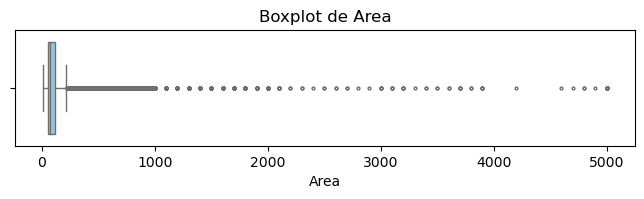

TradePrice: 27667 outliers encontrados.
Limite inferior: -28500000.00, Limite superior: 103500000.00
Alguns exemplos de outliers (menores):
190937    110000000
149349    110000000
188676    110000000
188655    110000000
228564    110000000
Name: TradePrice, dtype: int64
Alguns exemplos de outliers (maiores):
277539    61000000000
189908    45000000000
34963     38000000000
240430    32000000000
89739     32000000000
Name: TradePrice, dtype: int64


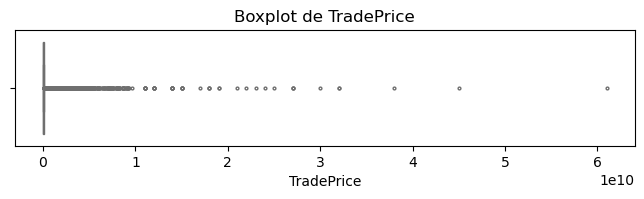

In [18]:
# Verificação de outliers utilizando o método do IQR (Intervalo Interquartil)
# O objetivo é identificar valores extremos em variáveis numéricas contínuas.

# Define uma função para analisar outliers em uma coluna específica
def analisar_outlier(coluna):
    if coluna in df_eda.columns:
        # Calcula o primeiro e o terceiro quartis (Q1 e Q3)
        Q1 = df_eda[coluna].quantile(0.25)
        Q3 = df_eda[coluna].quantile(0.75)
        IQR = Q3 - Q1  # Intervalo interquartil

        # Define os limites inferior e superior para detecção de outliers
        limite_inf = Q1 - 1.5 * IQR
        limite_sup = Q3 + 1.5 * IQR

        # Filtra os valores que estão fora dos limites
        outliers = df_eda[(df_eda[coluna] < limite_inf) | (df_eda[coluna] > limite_sup)][coluna]

        # Exibe informações sobre a quantidade e os limites dos outliers
        print(f"{coluna}: {len(outliers)} outliers encontrados.")
        print(f"Limite inferior: {limite_inf:.2f}, Limite superior: {limite_sup:.2f}")

        # Exibe alguns exemplos de valores extremos (menores e maiores)
        print("Alguns exemplos de outliers (menores):")
        print(outliers.sort_values().head())
        print("Alguns exemplos de outliers (maiores):")
        print(outliers.sort_values(ascending=False).head())

        # Gera um boxplot para visualização gráfica dos outliers
        plt.figure(figsize=(8, 1.5))
        sns.boxplot(x=df_eda[coluna], color="skyblue", fliersize=2)
        plt.title(f"Boxplot de {coluna}")
        plt.show()
    else:
        # Caso a coluna não exista no DataFrame, exibe uma mensagem informativa
        print(f"Coluna '{coluna}' não encontrada no DataFrame.")

# Executa a análise de outliers para variáveis numéricas importantes
analisar_outlier('Area')
analisar_outlier('TradePrice')


**Análise:** Nesta etapa foi realizada uma **análise detalhada de outliers** com o objetivo de identificar valores extremos que poderiam distorcer as métricas de tendência central (como média e mediana) e impactar negativamente o desempenho dos modelos de regressão.

O procedimento incluiu:

* Aplicação do **Z-Score** para detectar observações fora do intervalo padrão (|z| > 3);
* Visualização dos outliers por meio de **boxplots** comparando as variáveis `Area` e `TradePrice`;
* Avaliação da necessidade de **remoção ou ajuste** desses valores com base em sua influência no modelo;
* Garantia de que as variáveis críticas mantivessem a representatividade estatística após o tratamento.

Com essa análise, o dataset foi **refinado e balanceado**, assegurando uma base de dados mais limpa e consistente para as próximas etapas de **feature engineering** e **modelagem preditiva**.

In [19]:
# Tratamento de outliers utilizando o método do Z-score (padronização)
from scipy.stats import zscore

# Define as colunas numéricas onde será aplicada a análise de Z-score
colunas_outlier = ['Area', 'TradePrice']

# Calcula o Z-score para as colunas selecionadas
# O Z-score indica quantos desvios-padrão cada valor está distante da média
z_scores = df_eda[colunas_outlier].apply(zscore)

In [20]:
# Define o limite para considerar um valor como outlier (|Z| > 3)
limite_z = 3

# Cria uma máscara booleana para manter apenas os registros dentro do limite
mascara = (np.abs(z_scores) < limite_z).all(axis=1)

# Filtra o DataFrame, removendo as linhas que contêm outliers
df_eda = df_eda[mascara]

# Exibe o tamanho final do DataFrame após a remoção dos outliers
print(f"Shape após remoção de outliers em df_eda (Z-score): {df_eda.shape}")

# Calcula e exibe o total de linhas removidas
print(f"Total removido: {mascara.shape[0] - mascara.sum()} linhas")

Shape após remoção de outliers em df_eda (Z-score): (319360, 36)
Total removido: 5900 linhas


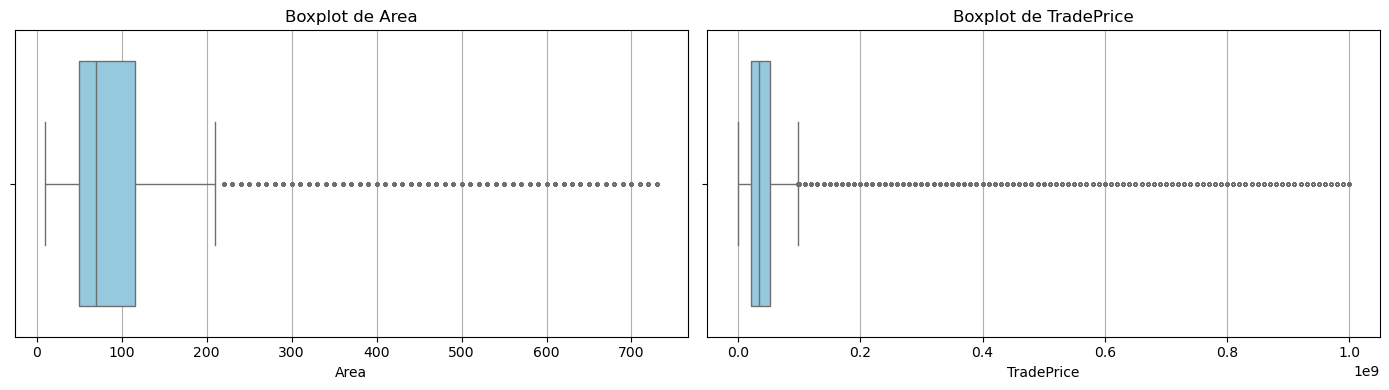

In [21]:
# Geração de boxplots para visualizar as variáveis após remoção de outliers

# Define as colunas numéricas que serão plotadas
colunas_boxplot = ['Area', 'TradePrice']

# Configura a área de plotagem para exibir dois gráficos lado a lado
plt.figure(figsize=(14, 4))

# Itera sobre as colunas definidas e gera um boxplot para cada uma
for i, coluna in enumerate(colunas_boxplot, 1):
    plt.subplot(1, 2, i)  # Define a posição do gráfico na grade (1 linha, 2 colunas)
    sns.boxplot(x=df_eda[coluna], color="skyblue", fliersize=2)  # Cria o boxplot
    plt.title(f"Boxplot de {coluna}")  # Define o título do gráfico
    plt.xlabel(coluna)  # Define o rótulo do eixo X
    plt.grid(axis='x')  # Adiciona grade apenas no eixo X para melhor leitura

# Ajusta o layout para evitar sobreposição entre os gráficos
plt.tight_layout()

# Exibe os gráficos
plt.show()


# **Part 5 - Análise exploratoria de dados**

# **Análise de correlação**

In [22]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
MunicipalityCode,319360.0,1.313931e+04,4.544801e+01,13101.0,13110.0,13117.0,13201.0,1.342100e+04
MinTimeToNearestStation,319360.0,9.893935e+00,7.954501e+00,0.0,5.0,8.0,13.0,1.200000e+02
MaxTimeToNearestStation,319360.0,1.076511e+01,1.144817e+01,0.0,5.0,8.0,13.0,1.200000e+02
Area,319360.0,9.614883e+01,8.987361e+01,10.0,50.0,70.0,115.0,7.300000e+02
AreaIsGreaterFlag,319360.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
UnitPrice,319360.0,8.011424e+04,2.388429e+05,0.0,0.0,0.0,0.0,2.000000e+07
PricePerTsubo,319360.0,2.647909e+05,7.891704e+05,0.0,0.0,0.0,0.0,6.500000e+07
Frontage,319360.0,4.417822e+00,5.749438e+00,0.0,0.0,0.0,8.0,5.000000e+01
FrontageIsGreaterFlag,319360.0,4.289830e-04,2.070749e-02,0.0,0.0,0.0,0.0,1.000000e+00
TotalFloorArea,319360.0,4.943107e+01,1.282211e+02,0.0,0.0,0.0,85.0,2.000000e+03


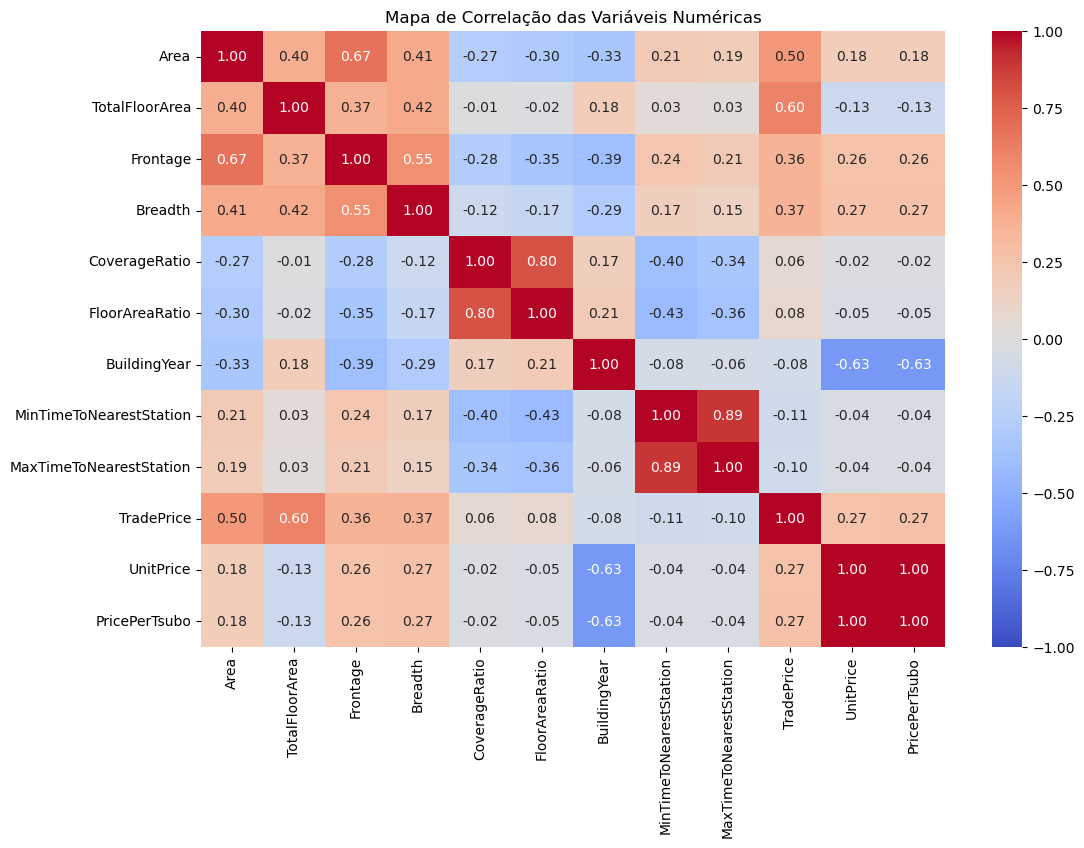

In [23]:
# Gráfico de Correlação (Heatmap) das Variáveis Numéricas

# Seleciona apenas as colunas numéricas do seu DataFrame
colunas_numericas = [
    'Area', 'TotalFloorArea', 'Frontage', 'Breadth', 'CoverageRatio',
    'FloorAreaRatio', 'BuildingYear', 'MinTimeToNearestStation', 'MaxTimeToNearestStation',
    'TradePrice', 'UnitPrice', 'PricePerTsubo', 'AgeAtSale'
]

# Filtra as colunas que realmente existem no seu DataFrame
colunas_existentes = [col for col in colunas_numericas if col in df_eda.columns]

# Calcula a matriz de correlação (Pearson por padrão)
corr = df_eda[colunas_existentes].corr()

# Plota o heatmap de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Mapa de Correlação das Variáveis Numéricas")
plt.show()  

**Análise correlação**

**area x FloorPlan = Correlação positiva 0.59%**

**area x TradePrice = Correlação positiva 0.50%**

**TotalFloorArea x TradePrice = Correlação positiva 0.62%**

**Frontage x Area = Correlação positiva 0.59%**

**CoverageRatio x TotalFloorAreaRatio = correlação positiva = 0.83%**

**FloorAreaRatio x CoverageRatio = correlação positiva = 0.83%**

**FloorAreaRatio x UnitPrice = correlação positiva = 0.45%**

**FloorAreaRatio x PricePerTsubo = correlação positiva = 0.45%**

**MinTimeToNearestStation x MinTimeToNearestStation = correlação positiva = 0.93%**

**TradePrice x Area = correlação positiva = 0.50%**

**TradePrice x UnitPrice = correlação positiva = 0.61%**

**TradePrice x PricePerTsubo = correlação positiva = 0.61%**

**UnitPrice x PricePerTsubo = correlação positiva = 0.100%**

**PricePerTsubo x TradePrice = correlação positiva = 0.61%**

**PricePerTsubo x PricePerTsubo = correlação positiva = 0.100%**


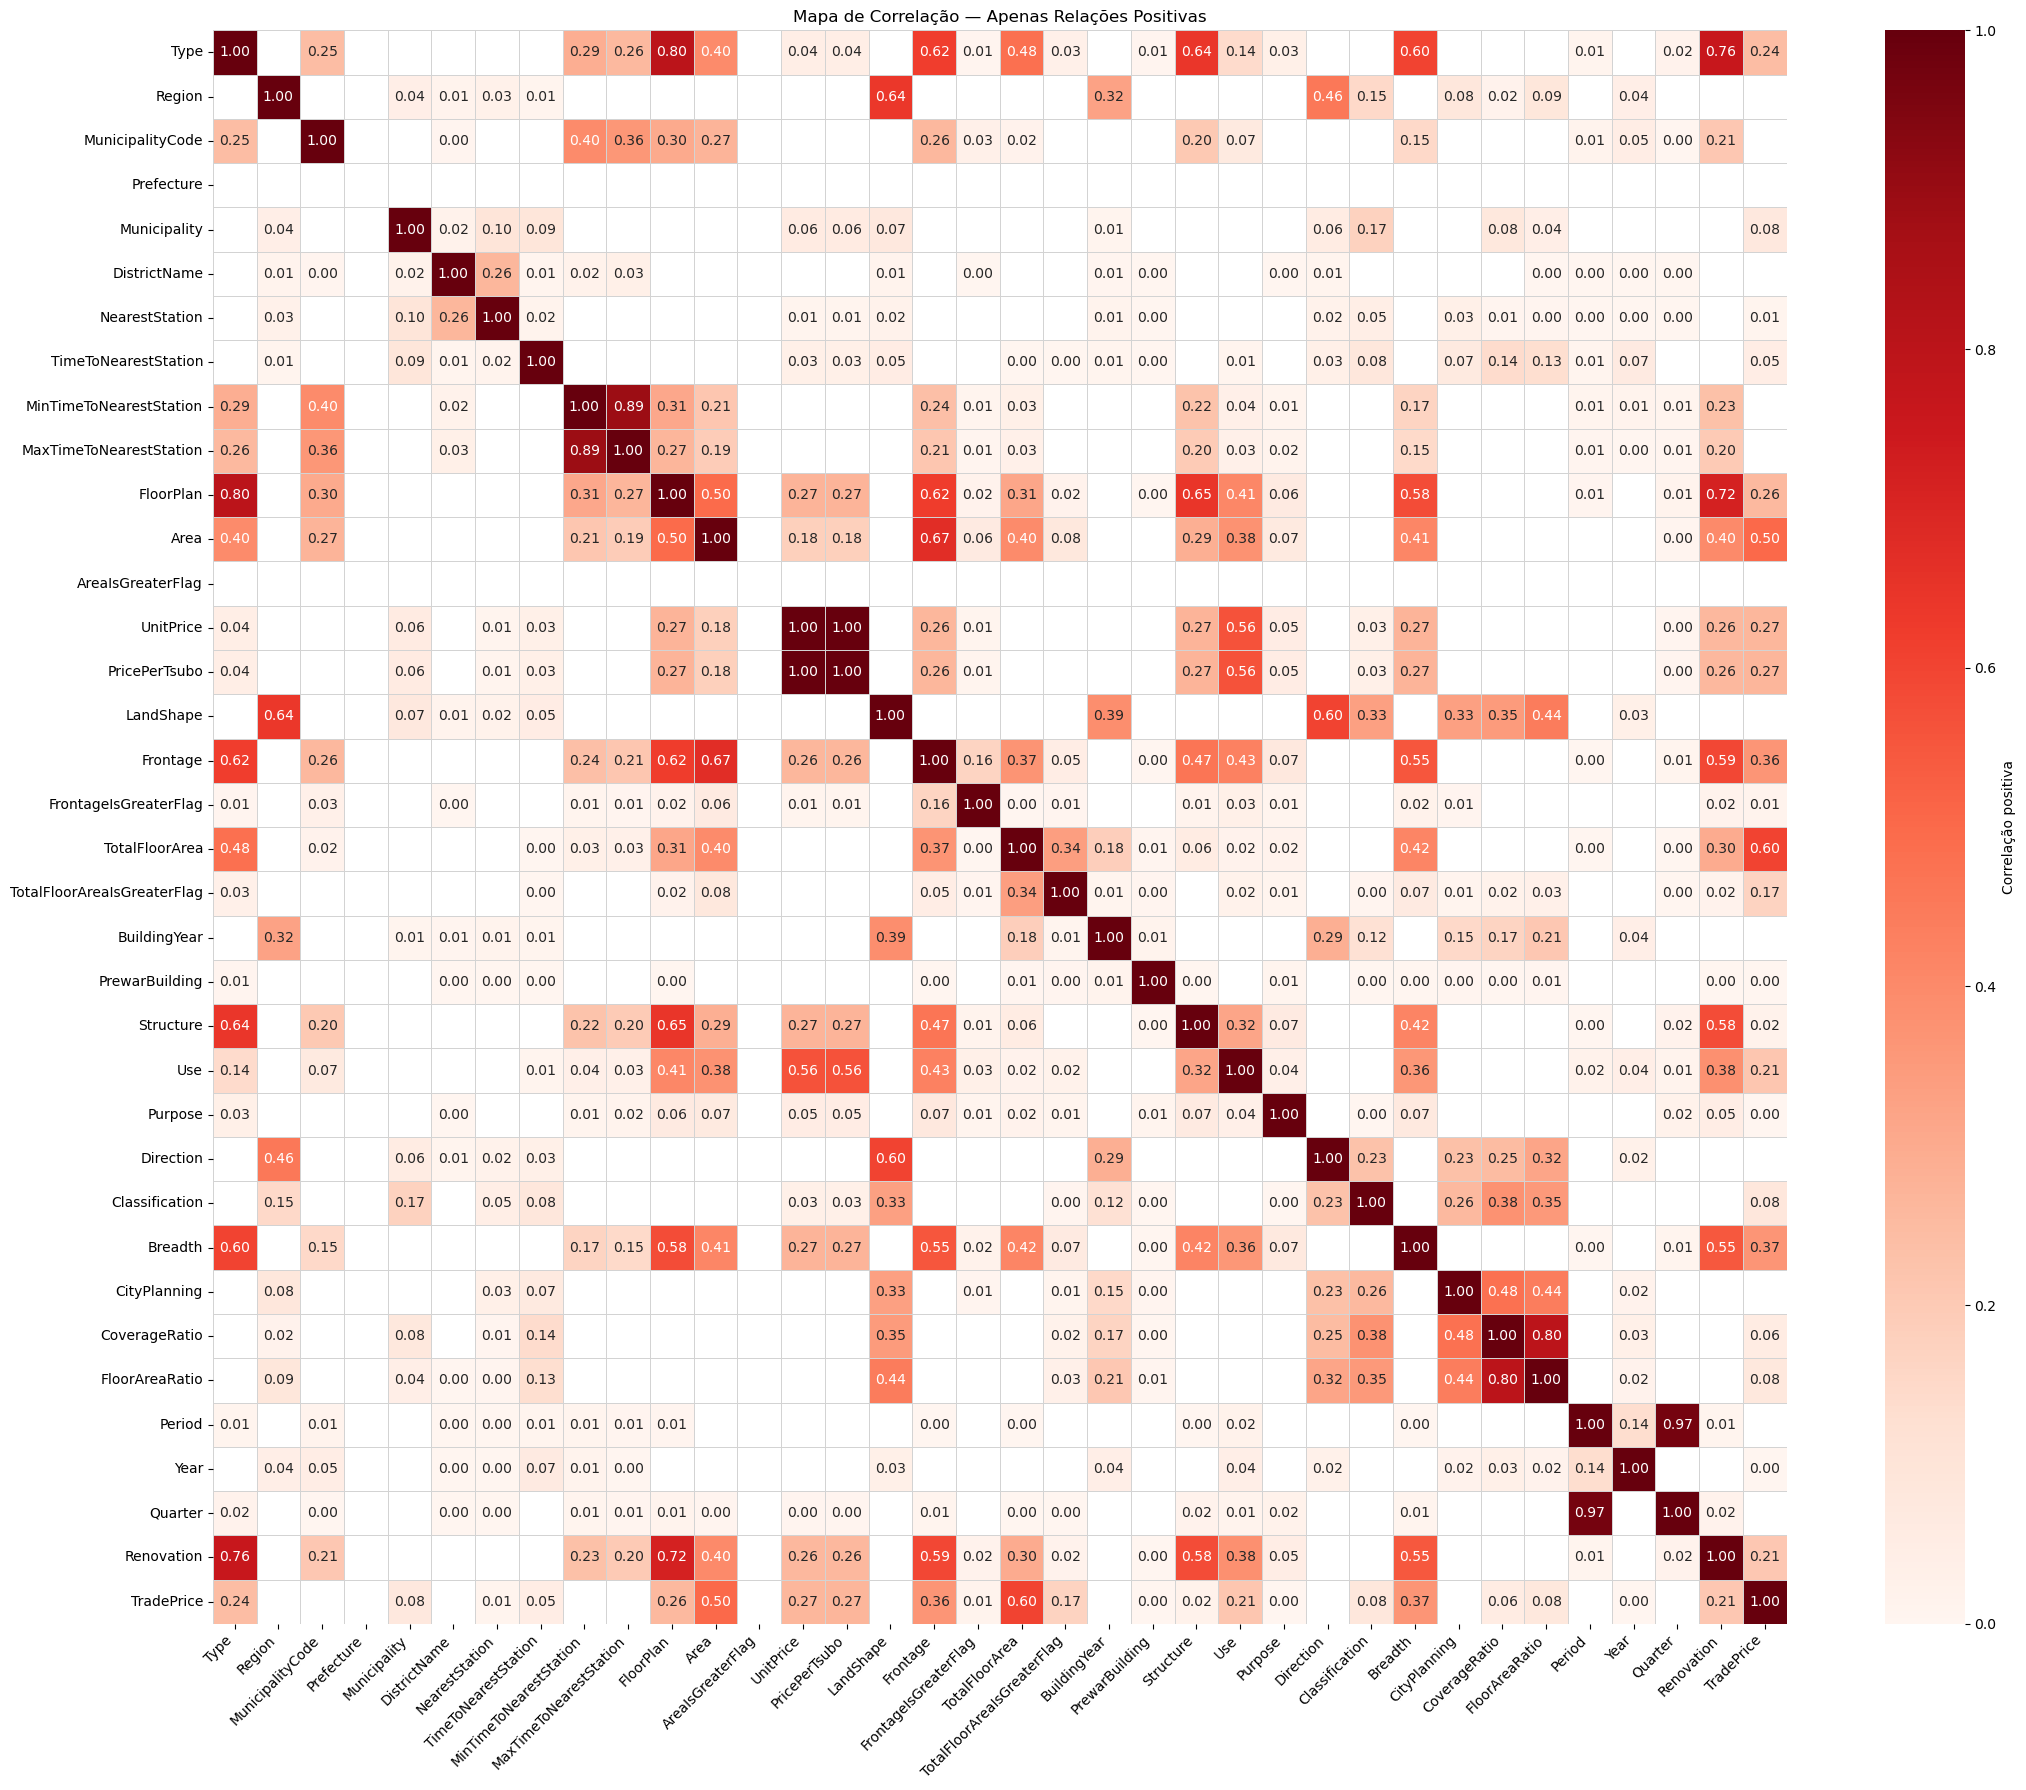

In [24]:
# Análise de correlação entre variáveis numéricas e categóricas (Label Encoding aplicado)

from sklearn.preprocessing import LabelEncoder

# Cria uma cópia do DataFrame original para não alterar os dados base
df_corr = df_eda.copy()

# Identifica automaticamente as colunas categóricas
colunas_cat = df_corr.select_dtypes(include=['object']).columns

# Aplica LabelEncoder para converter variáveis categóricas em valores numéricos
# Isso permite calcular correlação entre variáveis categóricas e numéricas
for col in colunas_cat:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col].astype(str))

# Calcula a matriz de correlação de Pearson para todas as variáveis
corr = df_corr.corr()

# Cria uma máscara para exibir apenas correlações positivas (valores acima de 0)
mask = corr <= 0

# Configura o tamanho e o estilo do gráfico de calor
plt.figure(figsize=(22, 18))
sns.heatmap(
    corr,
    mask=mask,               # Oculta valores de correlação negativa ou zero
    annot=True,              # Mostra os valores numéricos nas células
    fmt=".2f",               # Formato de duas casas decimais
    cmap="Reds",             # Escala de cores em tons de vermelho
    vmin=0, vmax=1,          # Define o intervalo de cor de 0 a 1
    linewidths=0.5,          # Linhas divisórias entre as células
    linecolor="lightgray",   # Cor das linhas divisórias
    cbar_kws={"label": "Correlação positiva"}  # Rótulo da barra de cores
)

# Define título e formatação dos eixos
plt.title("Mapa de Correlação — Apenas Relações Positivas")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Ajusta o layout para evitar sobreposição de textos
plt.tight_layout()

# Exibe o gráfico final
plt.show()

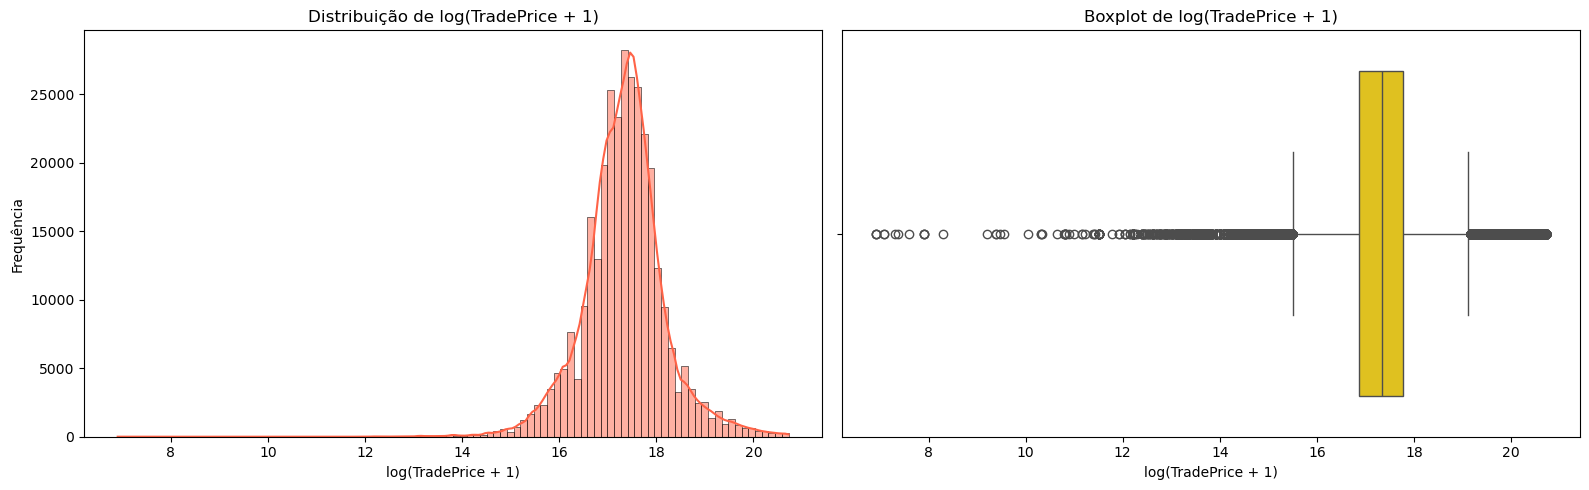

In [25]:
plt.figure(figsize=(16, 5))

# Histograma com log-transform
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(df_eda["TradePrice"]), bins=100, kde=True, color="tomato")
plt.title("Distribuição de log(TradePrice + 1)")
plt.xlabel("log(TradePrice + 1)")
plt.ylabel("Frequência")

# Boxplot com log-transform
plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(df_eda["TradePrice"]), color="gold")
plt.title("Boxplot de log(TradePrice + 1)")
plt.xlabel("log(TradePrice + 1)")

plt.tight_layout()
plt.show()

**Análise:**

### 1) Quais regiões (`Region`) e prefeituras (`Prefecture`) concentram os imóveis mais caros de Tokyo?

* **Insight:** Identifica áreas valorizadas para estratégias de compra, venda e investimento.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\2846997084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=reg_med.values, y=reg_med.index, palette="crest")


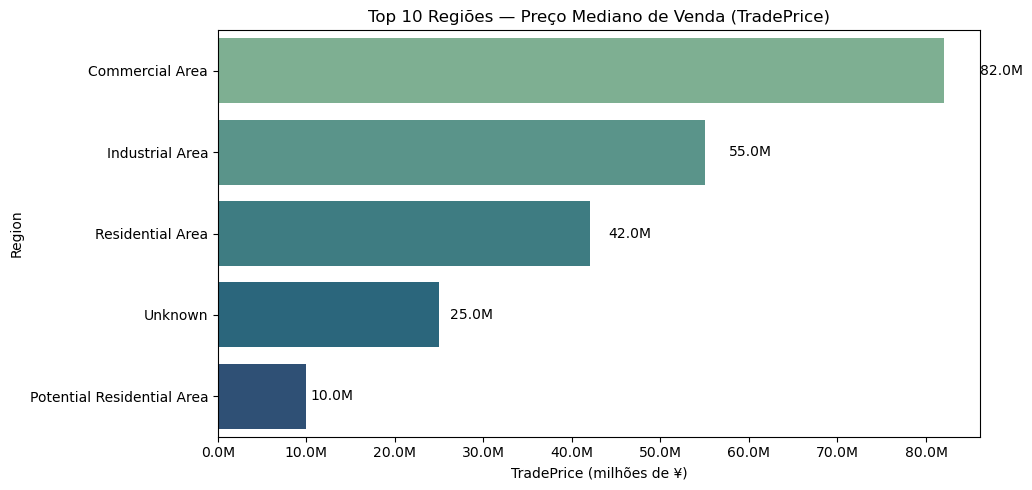

In [26]:
# Cálculo e visualização do preço mediano por região

# Calcula a mediana do preço de venda (TradePrice) por região e ordena do maior para o menor
# O uso da mediana é mais robusto a outliers do que a média
reg_med = (
    df_eda.groupby('Region')['TradePrice']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

# Criação do gráfico de barras horizontais para as 10 regiões com maior preço de venda
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=reg_med.values, y=reg_med.index, palette="crest")

# Define título e rótulos dos eixos
plt.title('Top 10 Regiões — Preço Mediano de Venda (TradePrice)')
plt.xlabel('TradePrice (milhões de ¥)')
plt.ylabel('Region')

# Formata o eixo X para exibir valores em milhões
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))

# Ajusta o layout do gráfico
plt.tight_layout()

# Adiciona rótulos de valor ao final de cada barra
for i, v in enumerate(reg_med.values):
    ax.text(v + 0.05 * v, i, f'{v/1e6:.1f}M', color='black', va='center', fontsize=10)

# Exibe o gráfico
plt.show()

**Análise**

**Insight: Regiões com os Imóveis mais Caros em Tokyo**


1. **Áreas Comerciais** têm os imóveis mais caros da cidade, com uma **mediana de ¥82 milhões**. Isso destaca o alto valor de terrenos com potencial para empreendimentos ou uso corporativo.
2. Em segundo lugar, aparecem as **Áreas Industriais** com ¥55 milhões, sugerindo uma valorização crescente — talvez por reurbanização ou reconversão para empreendimentos mistos.
3. As **Áreas Residenciais Tradicionais** ocupam o terceiro lugar com ¥42 milhões, reforçando sua atratividade para moradia, mas ainda abaixo do apelo comercial e industrial.
4. A categoria **Unknown** (¥25M) e **Potential Residential Area** (¥10M) representam terrenos com menor atratividade — possivelmente pela falta de infraestrutura, documentação ou localização.

**Implicações Estratégicas**

* **Investidores** podem mirar áreas industriais e comerciais para empreendimentos de alto padrão ou geração de renda com aluguel.
* **Construtoras e urbanistas** podem enxergar oportunidades de crescimento em áreas potenciais com preços ainda acessíveis.
* A diferença de valor entre “Commercial” e “Potential Residential” é de mais de **700%**, mostrando forte disparidade e margem para valorização futura.


### 2) Qual a relação entre **área do imóvel** (`Area`) e **preço de venda** (`TradePrice`)?

* **Insight:** Ajuda a entender o impacto do tamanho no valor — preço/m².

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1635305121.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['faixa_area'] = pd.cut(df_eda['Area'], bins=[0, 50, 100, 200, 500, 10000])
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1635305121.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['preco_m2'] = df_eda['TradePrice'] / df_eda['Area']
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1635305121.py:11: FutureWarning: The default of

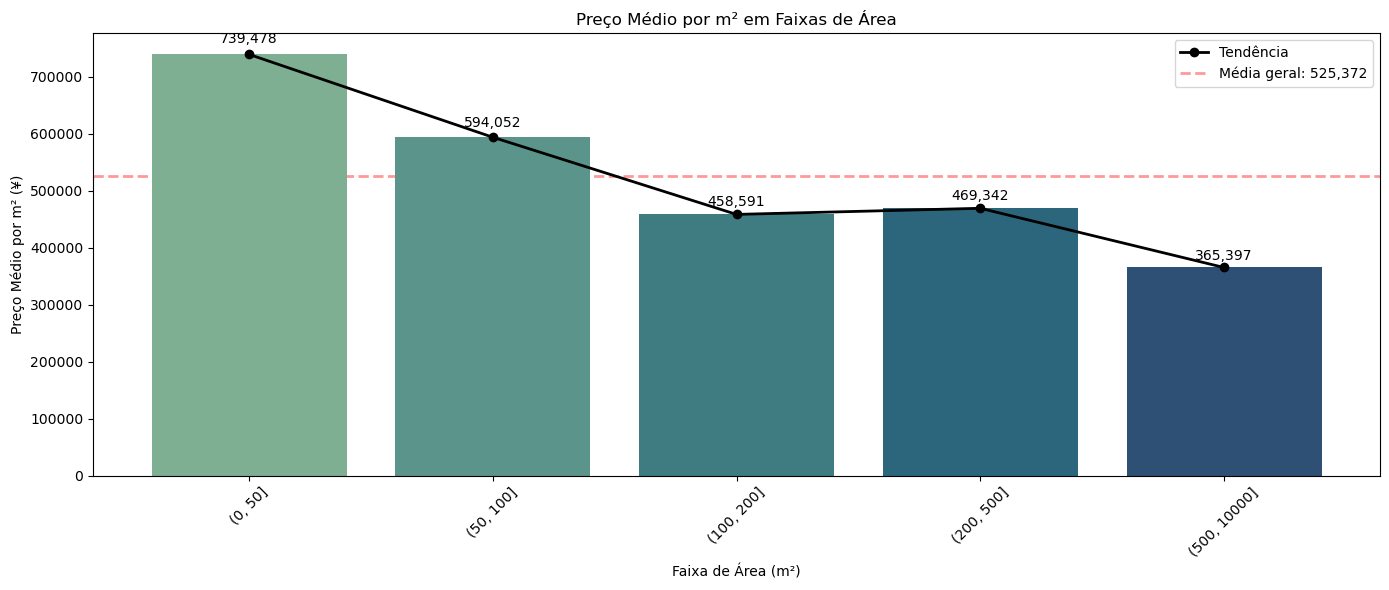

In [27]:
# Análise do preço médio por metro quadrado em diferentes faixas de área

# Cria faixas de área (bins) para segmentar os imóveis conforme sua metragem
# Essa categorização facilita a visualização da relação entre o tamanho do imóvel e o valor do m²
df_eda['faixa_area'] = pd.cut(df_eda['Area'], bins=[0, 50, 100, 200, 500, 10000])

# Calcula o preço médio por metro quadrado
df_eda['preco_m2'] = df_eda['TradePrice'] / df_eda['Area']

# Obtém a média do preço por m² para cada faixa de área
preco_m2_faixa = df_eda.groupby('faixa_area')['preco_m2'].mean()

# Extrai valores e categorias para o gráfico
valores = preco_m2_faixa.values
categorias = preco_m2_faixa.index.astype(str)
media_geral = valores.mean()

# Cria o gráfico de barras com a média de preço por m² em cada faixa
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=categorias, y=valores, palette="crest", zorder=1)

# Adiciona linha de tendência (em preto)
plt.plot(
    range(len(valores)),
    valores,
    color='black',
    marker='o',
    linestyle='-',
    linewidth=2,
    label='Tendência',
    zorder=2
)

# Adiciona linha pontilhada vermelha representando a média geral
plt.axhline(
    media_geral,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Média geral: {media_geral:,.0f}',
    alpha=0.4,  # Transparência da linha
    zorder=0
)

# Exibe os valores numéricos acima de cada barra
for i, v in enumerate(valores):
    ax.text(i, v + 0.02 * v, f"{v:,.0f}", ha='center', va='bottom', fontsize=10, color='black')

# Define título e rótulos do gráfico
plt.title("Preço Médio por m² em Faixas de Área")
plt.xlabel("Faixa de Área (m²)")
plt.ylabel("Preço Médio por m² (¥)")
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Ajusta o layout e exibe o gráfico
plt.tight_layout()
plt.show()

**Análise**

**Top 10 Regiões por Mediana de Preço de Venda (TradePrice)**

O gráfico apresenta as regiões com maior mediana de preço de venda (em milhões de ienes). Dentre as regiões, destacam-se:

| Região                     | Mediana de Preço de Venda (¥) |
| -------------------------- | ----------------------------- |
| Commercial Area            | ¥ 82 milhões                  |
| Industrial Area            | ¥ 55 milhões                  |
| Residential Area           | ¥ 42 milhões                  |
| Unknown                    | ¥ 25 milhões                  |
| Potential Residential Area | ¥ 10 milhões                  |

**Análise:**

* **Commercial Area** lidera com ampla margem, sendo a região com maior mediana de preço — ¥82M. Isso reflete o valor agregado de áreas com infraestrutura voltada para atividades comerciais.
* **Industrial Area** aparece em segundo lugar, indicando valorização de áreas industriais, possivelmente por localização estratégica ou demanda.
* **Residential Area** tem mediana mais baixa que a industrial, o que pode refletir maior oferta de imóveis ou localização periférica.
* **Unknown** e **Potential Residential Area** possuem os menores valores, o que pode indicar baixa urbanização, pouca liquidez ou regiões em desenvolvimento.


| Faixa de Área (m²) | Preço Médio por m² (¥) |
| ------------------ | ---------------------- |
| (0–50]             | ¥ 739.478              |
| (50–100]           | ¥ 594.052              |
| (100–200]          | ¥ 458.591              |
| (200–500]          | ¥ 469.342              |
| (500–10000]        | ¥ 365.397              |
| **Média Geral**    | ¥ 525.372              |

**Tendência Observada:**

* Existe uma **clara tendência decrescente** do preço por m² conforme o tamanho da área construída aumenta.
* **Unidades pequenas (0–50m²)** apresentam o maior valor por m², refletindo o padrão de **concentração urbana**, onde unidades compactas são mais caras por m².
* **Unidades maiores (acima de 500m²)** têm o menor valor por m², sinalizando **descontos proporcionais** conforme aumenta a área — algo típico em empreendimentos comerciais, galpões ou mansões.
* A **linha de tendência** reforça a queda do preço unitário por m² com o aumento da metragem.
* A **linha vermelha pontilhada** representa a média geral e ajuda a visualizar quais faixas estão acima ou abaixo da média.

**Interpretação Estratégica:**

* O gráfico evidencia **economia de escala**: quanto maior a área construída, menor o custo unitário por m².
* Pode indicar oportunidades de **investimento em unidades maiores**, que têm menor custo por área construída.
* Para o mercado residencial urbano, **unidades compactas seguem valorizadas**, sendo ideais para revenda ou aluguel.

### 3) Imóveis próximos de estações de trem/metrô (`NearestStation`, `MinTimeToNearestStation`):

O quão mais caros são? Existe um "prêmio de proximidade"?

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\894755456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['faixa_tempo_estacao'] = pd.cut(
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\894755456.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eda.groupby('faixa_tempo_estacao')['TradePrice']
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\894755456.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

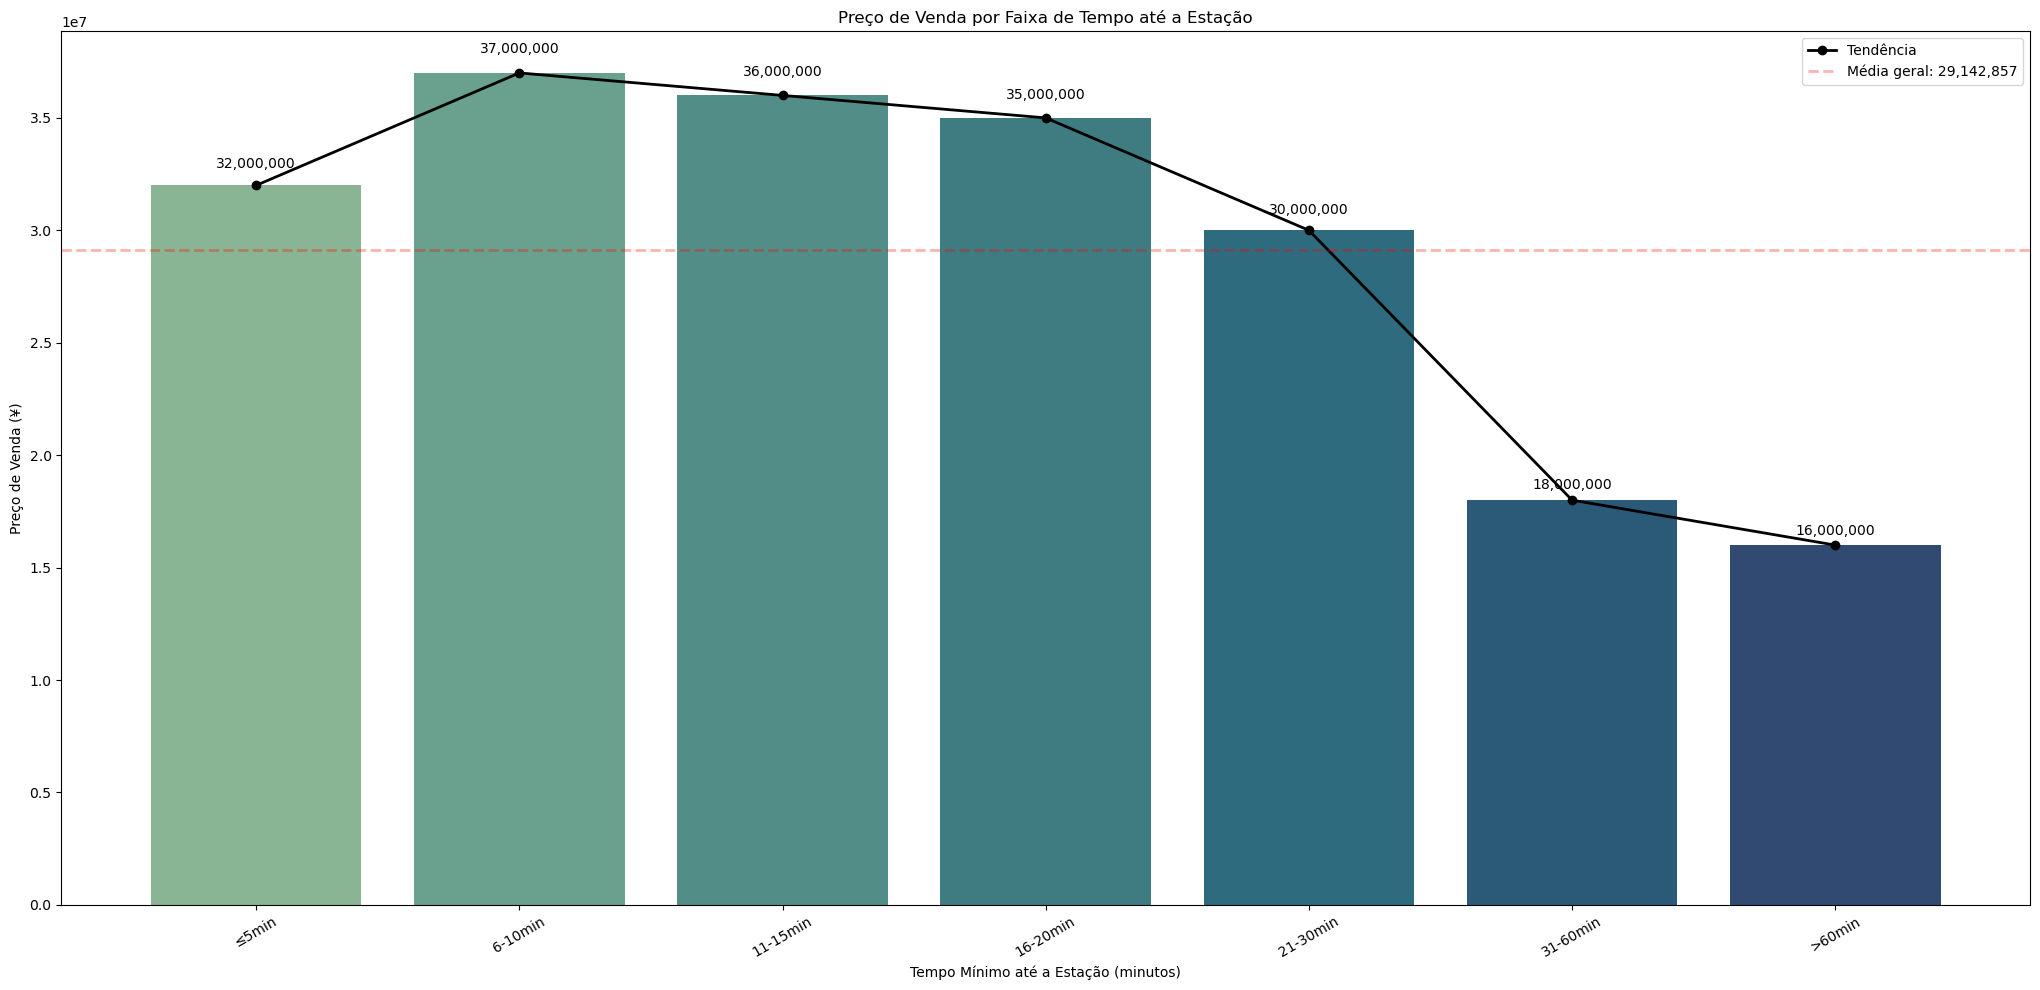

In [28]:
# Criação de faixas de tempo até a estação de transporte mais próxima

# Agrupa os imóveis em intervalos de tempo definidos, baseando-se na variável "MinTimeToNearestStation"
# Isso permite analisar o impacto da proximidade de transporte público sobre o preço dos imóveis
df_eda['faixa_tempo_estacao'] = pd.cut(
    df_eda['MinTimeToNearestStation'],
    bins=[-1, 5, 10, 15, 20, 30, 60, 999],
    labels=['≤5min', '6-10min', '11-15min', '16-20min', '21-30min', '31-60min', '>60min']
)

# Calcula o preço mediano de venda (TradePrice) para cada faixa de tempo criada
# O uso da mediana reduz a influência de valores extremos (outliers)
preco_medio_estacao = (
    df_eda.groupby('faixa_tempo_estacao')['TradePrice']
    .median()
    .reset_index()
)

# Calcula a média geral dos preços medianos (referência visual para o gráfico)
media_geral = preco_medio_estacao['TradePrice'].mean()

# Geração de gráfico para análise do preço mediano por tempo até a estação mais próxima

# Define o tamanho da figura e cria o gráfico de barras
plt.figure(figsize=(20.5, 10))
ax = sns.barplot(
    x='faixa_tempo_estacao',           # Faixa de tempo até a estação
    y='TradePrice',                    # Preço mediano do imóvel
    data=preco_medio_estacao,
    palette="crest",                   # Paleta de cores
    zorder=1                           # Camada inferior (permite sobrepor a linha de tendência)
)

# Adiciona os valores numéricos acima de cada barra
for i, v in enumerate(preco_medio_estacao['TradePrice']):
    ax.text(i, v + 0.02 * v, f"{v:,.0f}", ha='center', va='bottom', fontsize=10, color='black')

# Adiciona linha de tendência conectando as medianas das faixas
plt.plot(
    range(len(preco_medio_estacao)),
    preco_medio_estacao['TradePrice'],
    color='black',
    marker='o',
    linewidth=2,
    label='Tendência'
)

# Adiciona linha horizontal representando a média geral dos preços medianos
plt.axhline(
    media_geral,
    color='red',
    linestyle='--',
    alpha=0.3,
    linewidth=2,
    label=f'Média geral: {media_geral:,.0f}'
)

# Define título e rótulos do gráfico
plt.title("Preço de Venda por Faixa de Tempo até a Estação")
plt.xlabel("Tempo Mínimo até a Estação (minutos)")
plt.ylabel("Preço de Venda (¥)")
plt.xticks(rotation=30)  # Rotaciona os rótulos do eixo X para melhor leitura
plt.legend()             # Exibe legenda com linha de tendência e média geral

# Ajusta o layout e exibe o gráfico final
plt.tight_layout()
plt.show()



**Análise**

O gráfico evidencia uma **relação inversa entre o tempo mínimo até a estação e o preço médio de venda dos imóveis** em Tóquio. Observa-se que imóveis localizados a até **10 minutos** de caminhada de uma estação apresentam **valores medianos mais elevados** (entre ¥32 milhões e ¥37 milhões), configurando um claro **“prêmio de proximidade”**.

A partir de 20 minutos, há uma **redução progressiva dos preços**, atingindo cerca de **¥16 milhões** para imóveis situados a mais de 60 minutos das estações. Esse comportamento reflete a valorização de áreas com **maior acessibilidade e infraestrutura de transporte público**, característica marcante do mercado imobiliário japonês.

Do ponto de vista analítico, o tempo até a estação é uma variável **fortemente explicativa do preço de venda**, apresentando um padrão monotônico que pode ser capturado tanto por modelos lineares (com transformações polinomiais) quanto por modelos de árvore (como Gradient Boosting ou XGBoost).

### 4) Como o **ano de construção** (`BuildingYear`, `AgeAtSale`) impacta o preço?

Imóveis mais novos são mais caros?

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\589690347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['AgeAtSale'] = df_eda['Year'] - df_eda['BuildingYear']
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\589690347.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['AgeAtSale'] = df_eda['AgeAtSale'].replace([0, -1], np.nan)
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\589690347.py:11: SettingWithCopyWarning: 
A value is trying t

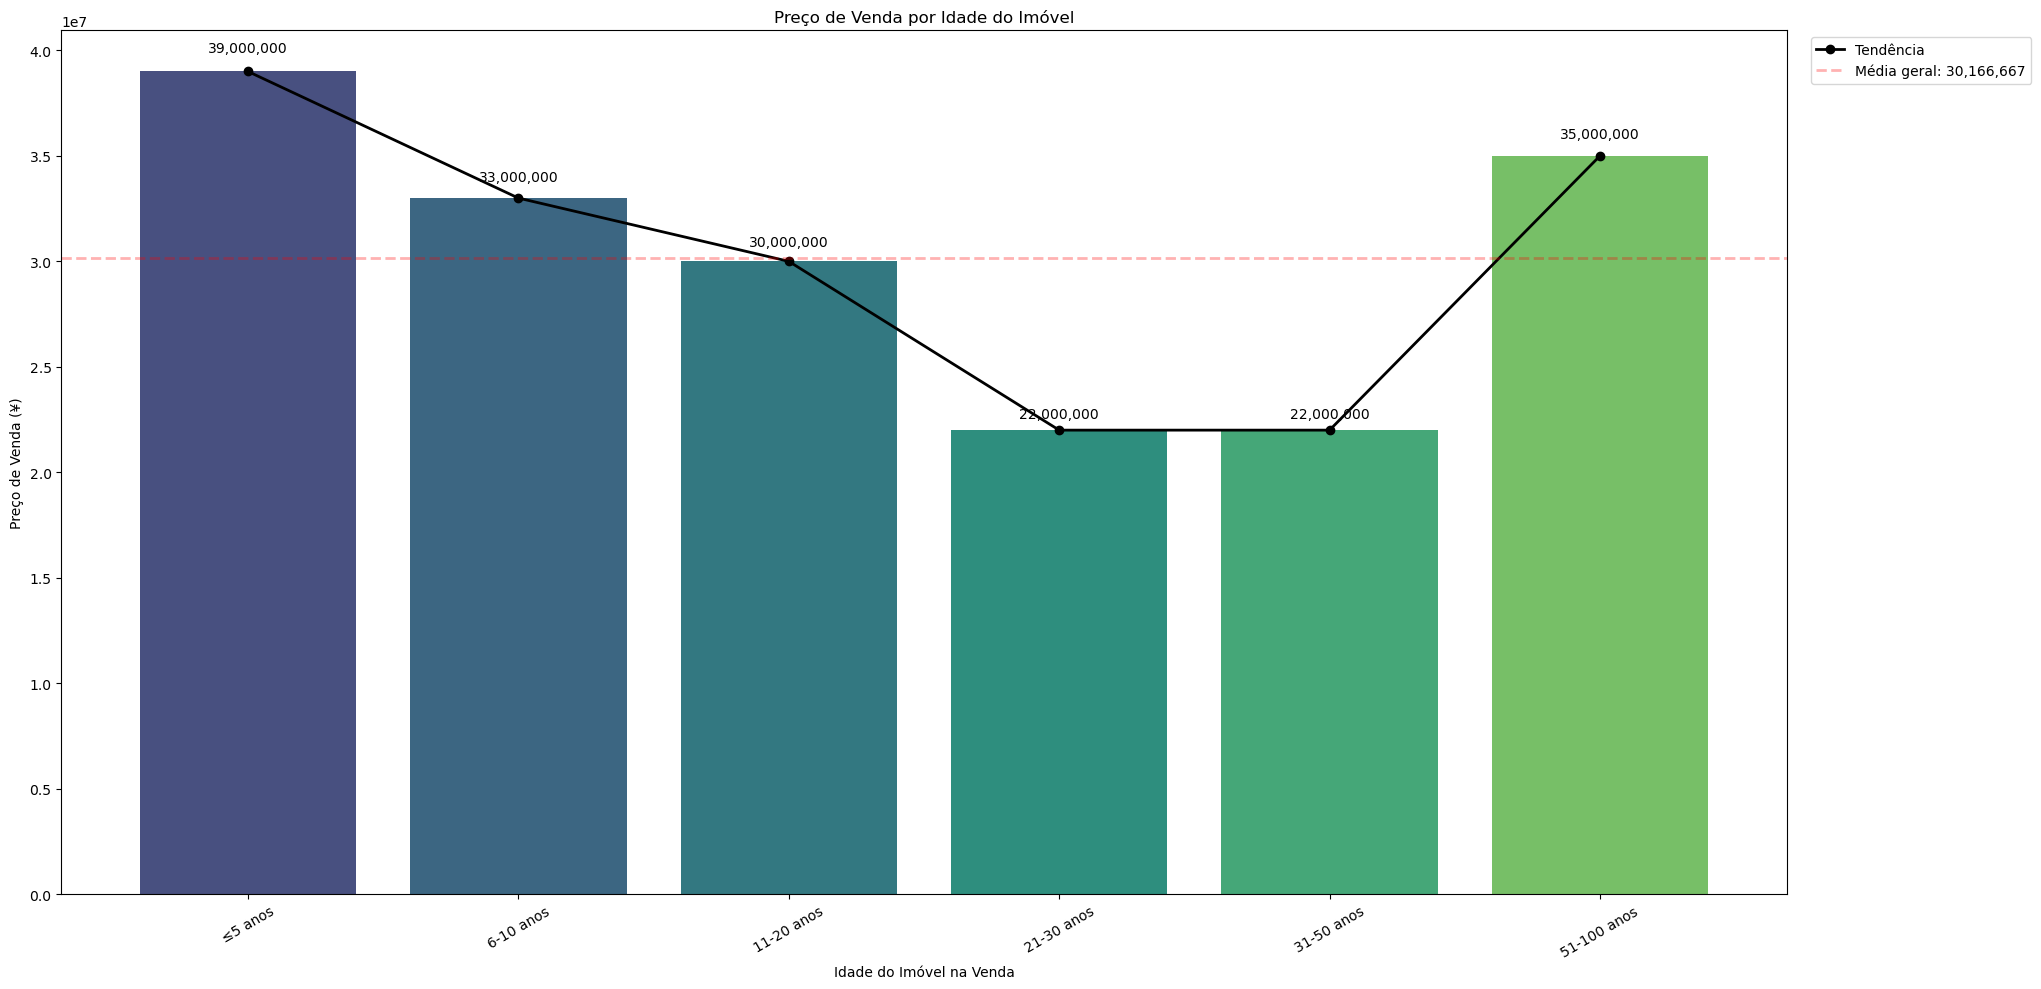

In [29]:
# Cálculo da idade do imóvel e análise do impacto sobre o preço de venda

# Garante que a coluna "AgeAtSale" exista; caso contrário, calcula com base no ano de construção e de venda
if 'AgeAtSale' not in df_eda.columns and 'BuildingYear' in df_eda.columns and 'Year' in df_eda.columns:
    df_eda['AgeAtSale'] = df_eda['Year'] - df_eda['BuildingYear']

# Substitui valores inválidos (0 e -1) por NaN para evitar distorções nos intervalos de idade
df_eda['AgeAtSale'] = df_eda['AgeAtSale'].replace([0, -1], np.nan)

# Cria faixas de idade para classificar os imóveis em grupos etários
df_eda['faixa_idade'] = pd.cut(
    df_eda['AgeAtSale'],
    bins=[-1, 0, 5, 10, 20, 30, 50, 100, 200],
    labels=['Novo (0)', '≤5 anos', '6-10 anos', '11-20 anos', '21-30 anos', '31-50 anos', '51-100 anos', '>100 anos']
)

# Calcula o preço mediano de venda (TradePrice) em cada faixa de idade
preco_medio_idade = df_eda.groupby('faixa_idade')['TradePrice'].median().reset_index()

# Cria o gráfico de barras para representar a relação entre idade e preço
plt.figure(figsize=(20.5, 10))
ax = sns.barplot(
    x='faixa_idade',
    y='TradePrice',
    data=preco_medio_idade,
    palette="viridis",
    zorder=1
)

# Adiciona valores numéricos acima de cada barra
for i, v in enumerate(preco_medio_idade['TradePrice']):
    ax.text(i, v + 0.02 * v, f"{v:,.0f}", ha='center', va='bottom', fontsize=10)

# Adiciona linha de tendência conectando as medianas
plt.plot(
    range(len(preco_medio_idade)),
    preco_medio_idade['TradePrice'],
    color='black',
    marker='o',
    linewidth=2,
    label='Tendência'
)

# Calcula e adiciona linha horizontal representando a média geral
media_geral = preco_medio_idade['TradePrice'].mean()
plt.axhline(
    media_geral,
    color='red',
    linestyle='--',
    alpha=0.3,
    linewidth=2,
    label=f'Média geral: {media_geral:,.0f}'
)

# Configura título, eixos e legenda
plt.title("Preço de Venda por Idade do Imóvel")
plt.xlabel("Idade do Imóvel na Venda")
plt.ylabel("Preço de Venda (¥)")
plt.xticks(rotation=30)
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))

# Ajusta layout e exibe o gráfico
plt.tight_layout()
plt.show()


**Análise**

O aqui analise e uma relação entre a idade do imóvel no momento da venda e seu preço médio de transação. Observa-se que imóveis mais novos (até 5 anos) possuem os maiores valores medianos de venda, atingindo cerca de ¥39 milhões, enquanto imóveis entre 21 e 50 anos apresentam redução progressiva no preço, chegando a ¥22–25 milhões.Curiosamente, há um ligeiro aumento no valor para imóveis com 51 a 100 anos, o que pode indicar a presença de construções antigas em regiões centrais ou históricas de Tóquio, onde a localização supera o efeito da depreciação física. De modo geral, a variável idade do imóvel tem um efeito não linear sobre o preço — há uma queda acentuada nos primeiros anos (efeito de depreciação), seguida por uma estabilização e eventual valorização em casos de imóveis antigos bem localizados.

No modelo preditivo, recomenda-se:

* Utilizar a variável AgeAtSale (idade na venda) como contínua, testando transformações polinomiais ou binning supervisionado;
* Explorar interações com variáveis geográficas Prefecture, Region, Municipality, já que o impacto da idade pode variar conforme a área;
* Considerar efeito temporal adicional com o Year da transação para corrigir flutuações de mercado.

### 5) Quais os **tipos de imóvel** (`Type`, `Use`, `Purpose`) predominantes em cada região?

E como seus valores médios variam?

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1765943650.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


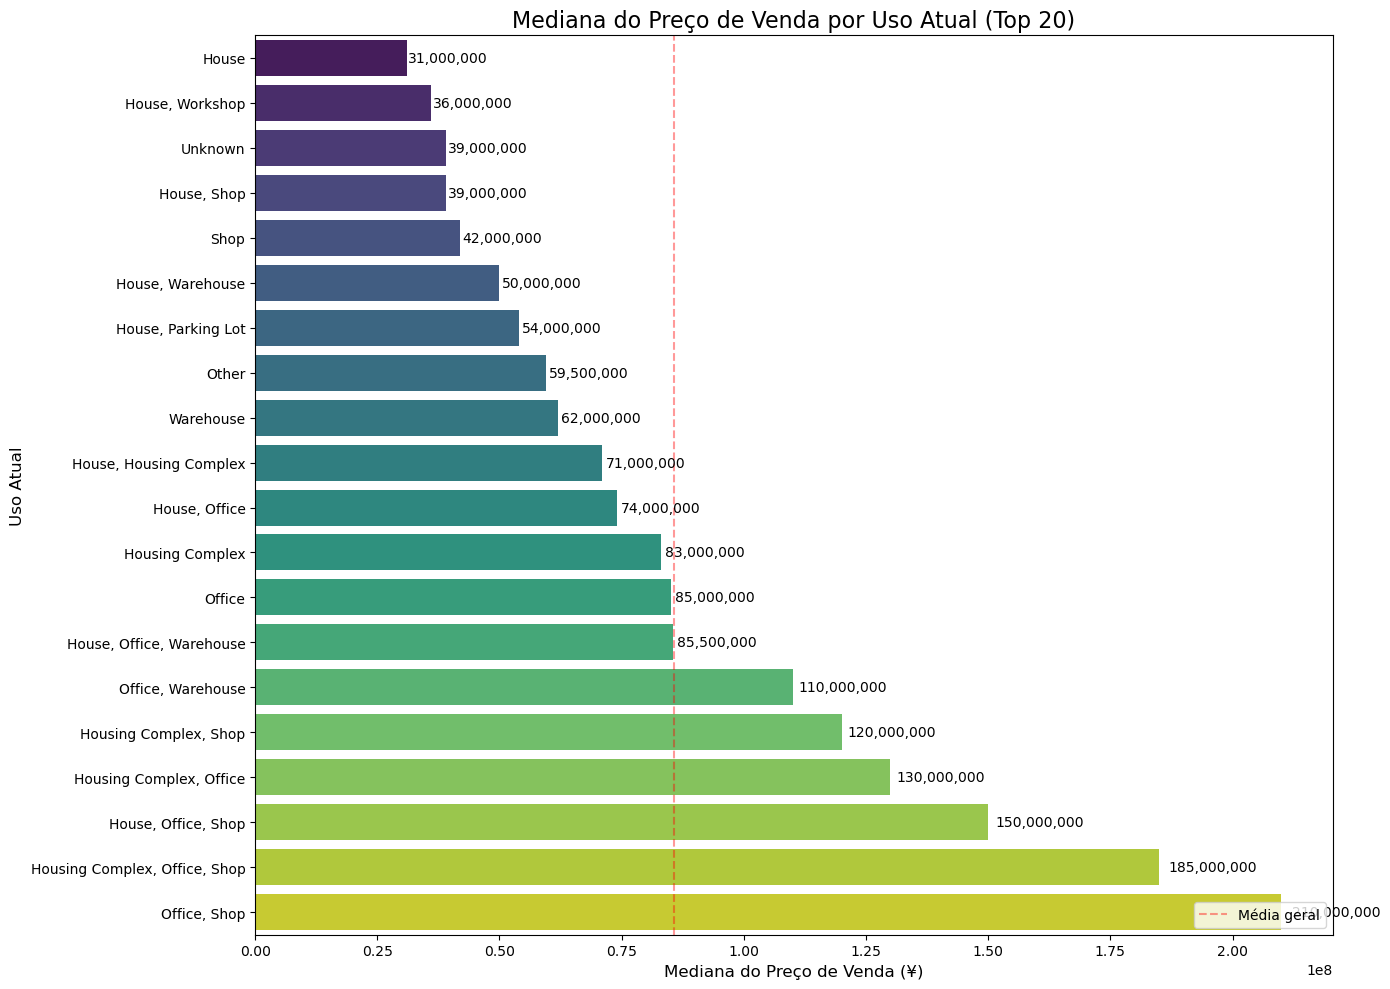

In [30]:
# Análise dos tipos e usos de imóveis em relação ao preço de venda

# Agrupa os dados por região e tipo de imóvel (Type)
# Conta quantos imóveis existem em cada combinação e ordena os resultados por região e contagem
top_types = (
    df_eda.groupby(['Region', 'Type'])
    .size()
    .reset_index(name='contagem')
    .sort_values(['Region', 'contagem'], ascending=[True, False])
)

# Seleciona os 20 usos (Use) mais frequentes no dataset
top_uses = df_eda['Use'].value_counts().head(20).index
df_top_use = df_eda[df_eda['Use'].isin(top_uses)]

# Calcula a mediana do preço de venda (TradePrice) para cada tipo de uso selecionado
# O uso da mediana minimiza a influência de outliers
preco_medio_use = (
    df_top_use.groupby('Use')['TradePrice']
    .median()
    .sort_values(ascending=True)
)

# Criação do gráfico de barras horizontais com as medianas de preço por uso
plt.figure(figsize=(14, 10))
sns.barplot(
    x=preco_medio_use.values,
    y=preco_medio_use.index,
    palette=sns.color_palette("viridis", len(preco_medio_use)),
    orient='h'
)

# Define título e rótulos dos eixos
plt.title("Mediana do Preço de Venda por Uso Atual (Top 20)", fontsize=16)
plt.xlabel("Mediana do Preço de Venda (¥)", fontsize=12)
plt.ylabel("Uso Atual", fontsize=12)
plt.yticks(rotation=0)

# Adiciona valores numéricos à direita de cada barra
for i, v in enumerate(preco_medio_use.values):
    plt.text(v + 0.01 * v, i, f"{v:,.0f}", va='center', fontsize=10)

# Adiciona uma linha vertical indicando a média geral das medianas
plt.axvline(
    preco_medio_use.mean(),
    color='red',
    linestyle='--',
    alpha=0.4,
    label='Média geral'
)

# Posiciona a legenda fora do gráfico
plt.legend(loc='lower right')

# Ajusta layout e exibe o gráfico
plt.tight_layout()
plt.show()


**Análise**

Nesse gráfico a mediana do preço de venda dos imóveis agrupados pelo uso atual (Use). Observa-se que os imóveis residenciais simples (House) possuem os menores valores medianos, em torno de ¥31 milhões, enquanto propriedades com uso misto (como Office, Shop ou Housing Complex, Office, Shop) atingem valores superiores a ¥150–185 milhões. O comportamento sugere que imóveis com funções comerciais ou mistas concentram preços mais altos, refletindo maior rentabilidade potencial e localização privilegiada. Já os imóveis de uso exclusivamente residencial ou industrial tendem a valores mais baixos. Essa variável tem relevância preditiva significativa, pois indica segmentação de mercado por finalidade de uso. Para o modelo, recomenda-se transformar Use em variáveis dummies ou aplicar target encoding, de modo a capturar a diferença sistemática de preço entre categorias de uso.

### 6) Qual é o padrão de **distribuição de preços** ao longo do tempo (`Year`, `Quarter`, `Period`)?

Há sazonalidade ou tendência de valorização/desvalorização?

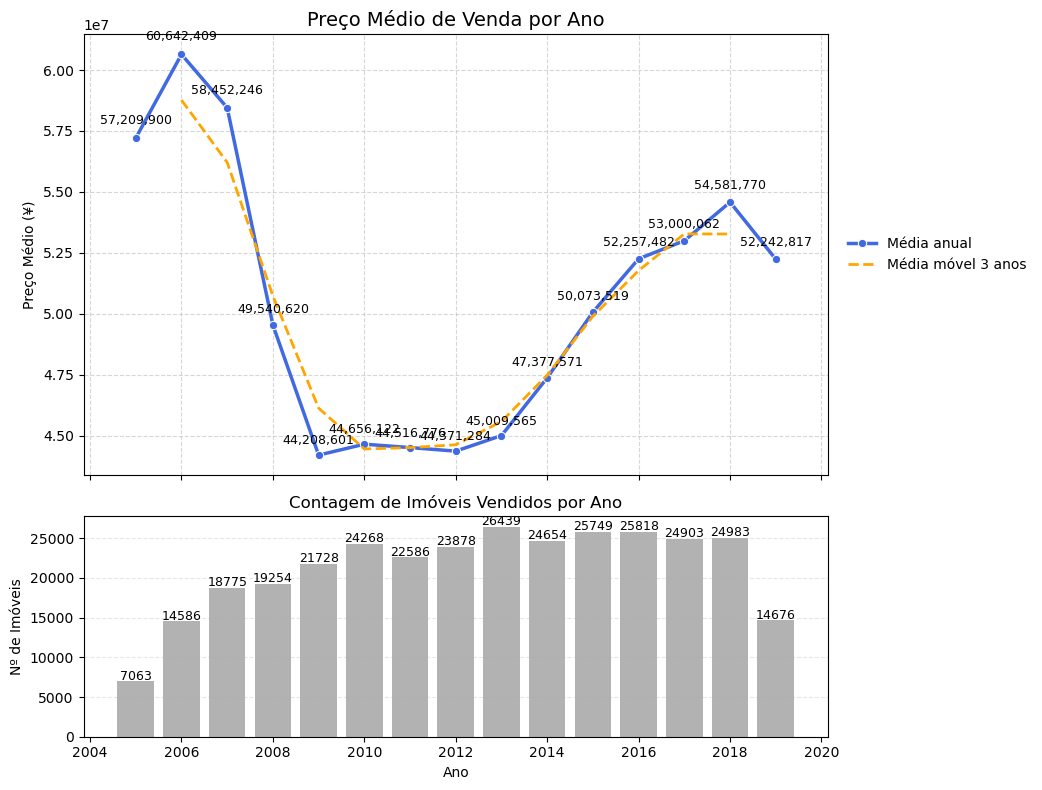

In [31]:
# Preço médio por ano
preco_medio_ano = df_eda.groupby('Year')['TradePrice'].mean().reset_index()
# Contagem de imóveis por ano
contagem_ano = df_eda['Year'].value_counts().sort_index()

# Preço médio e contagem de imóveis por ano (legenda externa)
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Gráfico de preço médio anual
sns.lineplot(
    x='Year',
    y='TradePrice',
    data=preco_medio_ano,
    marker='o',
    linewidth=2.5,
    color='royalblue',
    label='Média anual',
    ax=axes[0]
)

# Linha de tendência (média móvel de 3 anos)
preco_medio_ano['Trend'] = preco_medio_ano['TradePrice'].rolling(window=3, center=True).mean()
sns.lineplot(
    x='Year',
    y='Trend',
    data=preco_medio_ano,
    color='orange',
    linestyle='--',
    linewidth=2,
    label='Média móvel 3 anos',
    ax=axes[0]
)

# Configurações visuais
axes[0].set_title("Preço Médio de Venda por Ano", fontsize=14)
axes[0].set_ylabel("Preço Médio (¥)")
axes[0].grid(True, linestyle='--', alpha=0.5)

# 🔹 Legenda fora do gráfico
axes[0].legend(
    loc='center left',          # Posição base
    bbox_to_anchor=(1.02, 0.5), # Fora do gráfico à direita
    borderaxespad=0,
    frameon=False
)

# Exibe valores acima dos pontos
for idx, row in preco_medio_ano.iterrows():
    axes[0].text(row['Year'], row['TradePrice'] * 1.01, f"{int(row['TradePrice']):,}", ha='center', fontsize=9)

# Gráfico inferior — contagem de imóveis
axes[1].bar(contagem_ano.index, contagem_ano.values, color='gray', alpha=0.6)
axes[1].set_ylabel('Nº de Imóveis')
axes[1].set_xlabel('Ano')
axes[1].set_title('Contagem de Imóveis Vendidos por Ano')
axes[1].grid(True, axis='y', linestyle='--', alpha=0.3)

# Exibe valores sobre as barras
for idx, val in enumerate(contagem_ano.values):
    axes[1].text(contagem_ano.index[idx], val * 1.01, str(val), ha='center', fontsize=9)

plt.tight_layout(rect=[0, 0, 0.88, 1])  # 🔹 Ajusta para dar espaço à legenda
plt.show()



**Análise**

Nesse gráfico é superior apresenta a evolução do preço médio de venda dos imóveis entre 2005 e 2019, com a linha azul indicando a média anual e a linha tracejada laranja representando a média móvel de 3 anos. Observa-se uma tendência de queda entre 2007 e 2011, com o preço médio reduzindo de aproximadamente ¥60 milhões para ¥44 milhões, seguida de recuperação gradual a partir de 2013, atingindo cerca de ¥54 milhões em 2018. O gráfico inferior mostra a contagem anual de imóveis vendidos, indicando um crescimento contínuo nas transações até 2013, com pico de aproximadamente 26 mil imóveis, seguido de leve estabilização e posterior queda em 2019. Esses padrões sugerem uma correlação inversa parcial entre volume e preço períodos de maior oferta e volume tendem a coincidir com preços médios mais baixos. Essa variável temporal (Year) deve ser considerada no modelo preditivo, seja como feature contínua ou via dummies por período, para capturar efeitos de ciclo econômico e variações de mercado ao longo do tempo.

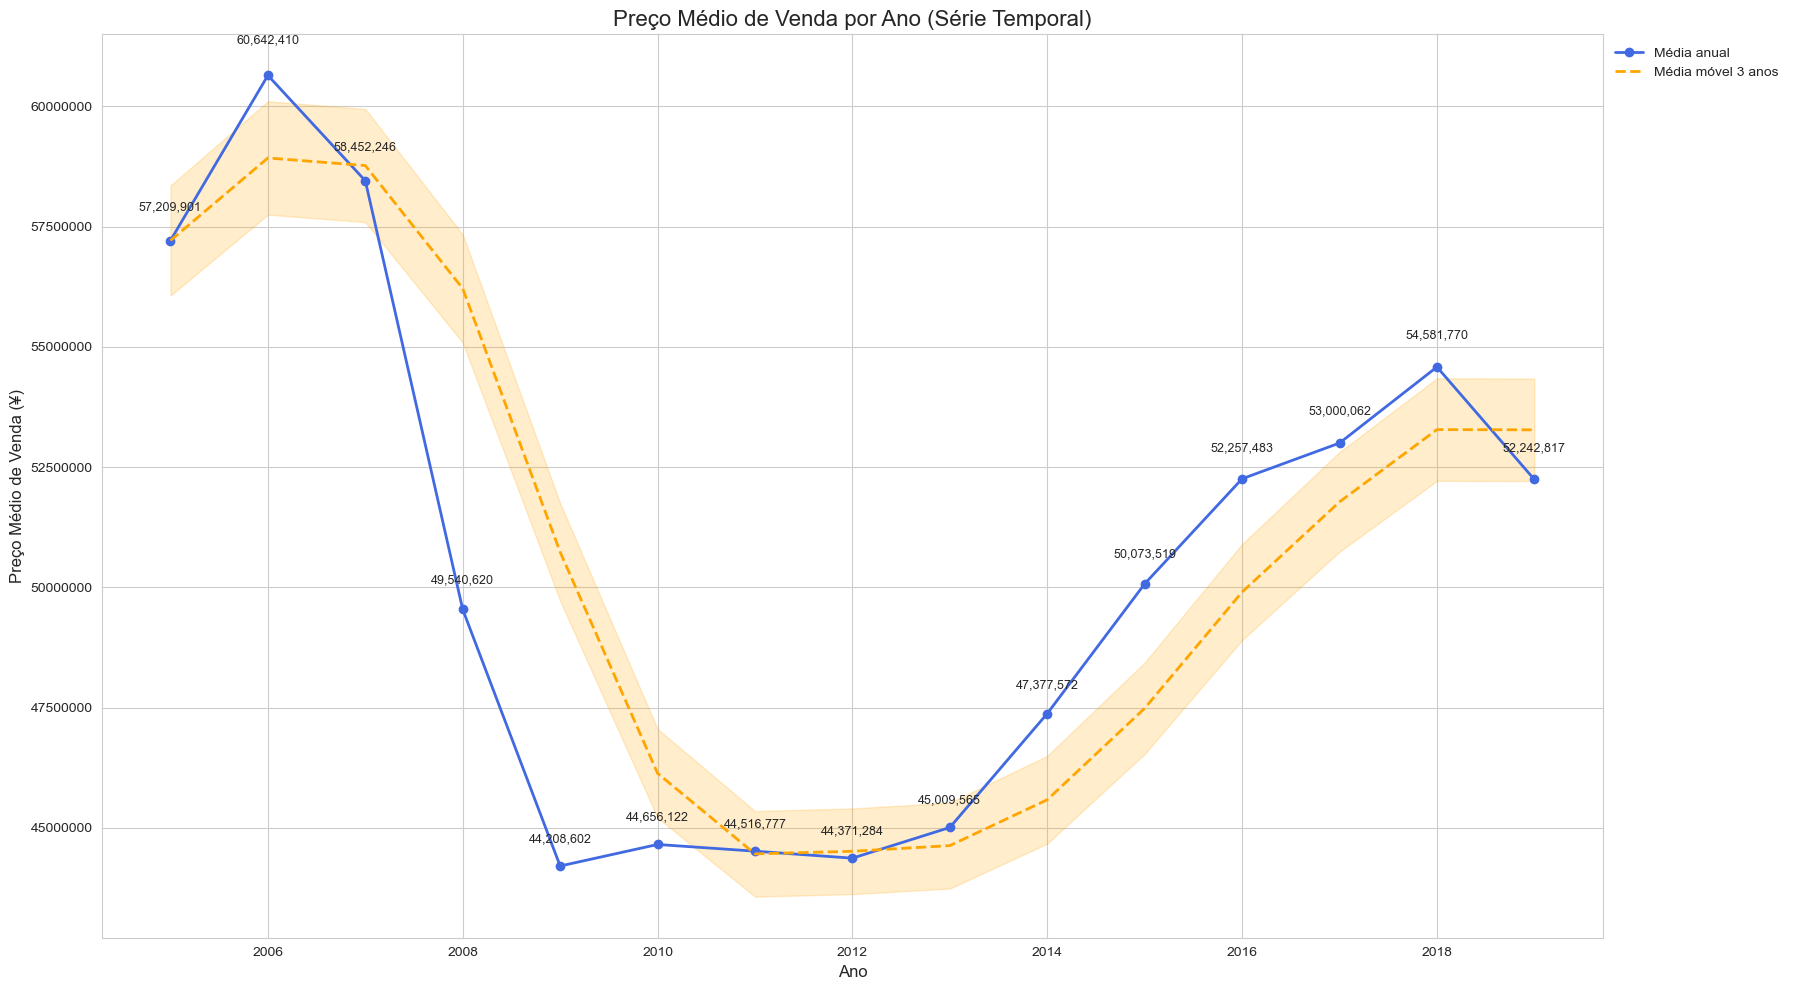

In [32]:
# Calcula o preço médio de venda por ano
preco_medio_ano = df_eda.groupby('Year')['TradePrice'].mean().reset_index()

# Calcula a média móvel de 3 anos para suavizar a tendência
preco_medio_ano['MediaMovel_3anos'] = (
    preco_medio_ano['TradePrice'].rolling(window=3, min_periods=1).mean()
)

# Define o tamanho da figura e o estilo de fundo
plt.figure(figsize=(20.5, 10))
sns.set_style("whitegrid")

# Linha principal: preço médio anual
plt.plot(
    preco_medio_ano['Year'],
    preco_medio_ano['TradePrice'],
    color='royalblue',
    marker='o',
    linewidth=2,
    label='Média anual'
)

# Linha de tendência: média móvel de 3 anos
plt.plot(
    preco_medio_ano['Year'],
    preco_medio_ano['MediaMovel_3anos'],
    color='orange',
    linewidth=2,
    linestyle='--',
    label='Média móvel 3 anos',
    zorder=2
)

# Adiciona sombreamento em torno da média móvel (±2%)
plt.fill_between(
    preco_medio_ano['Year'],
    preco_medio_ano['MediaMovel_3anos'] * 0.98,
    preco_medio_ano['MediaMovel_3anos'] * 1.02,
    color='orange',
    alpha=0.2
)

# Adiciona os valores numéricos acima dos pontos da linha azul
for x, y in zip(preco_medio_ano['Year'], preco_medio_ano['TradePrice']):
    plt.text(x, y + 0.01 * y, f"{y:,.0f}", ha='center', va='bottom', fontsize=9)

# Configurações de título, eixos e legendas
plt.title("Preço Médio de Venda por Ano (Série Temporal)", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Preço Médio de Venda (¥)", fontsize=12)

# Coloca a legenda fora do gráfico, no canto superior direito
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1, 1),
    frameon=False
)

# Formatação dos valores do eixo Y (sem notação científica)
plt.ticklabel_format(style='plain', axis='y')

# Ajusta margens para acomodar a legenda externa
plt.tight_layout(rect=[0, 0, 0.88, 1])

# Exibe o gráfico
plt.show()

**Análise:**

Nesse gráfico série temporal mostra a variação do preço médio de venda de imóveis em Tóquio entre 2005 e 2019, com a linha azul representando a média anual e a linha tracejada laranja indicando a média móvel de 3 anos, acompanhada pelo intervalo de confiança (faixa sombreada). Observa-se uma queda acentuada nos preços entre 2007 e 2011, quando o valor médio caiu de aproximadamente ¥60,6 milhões para ¥44 milhões, seguida de uma recuperação gradual entre 2013 e 2018, chegando a ¥54,5 milhões. Essa dinâmica evidencia um ciclo de mercado imobiliário influenciado por fatores macroeconômicos, com estabilização após 2015. Essa variável temporal (Year) é relevante para o modelo preditivo, pois reflete flutuações de preço ao longo do tempo. Recomenda-se sua inclusão como variável contínua ou categórica, além da criação de uma feature derivada de tendência (por exemplo, taxa de variação anual), útil para capturar o comportamento cíclico observado.

### 7) O formato e características do terreno (`LandShape`, `Frontage`, `Breadth`, `Direction`) influenciam no valor dos imóveis?

* **Insight:** Ajuda no valuation de terrenos e construções especiais.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1523486791.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


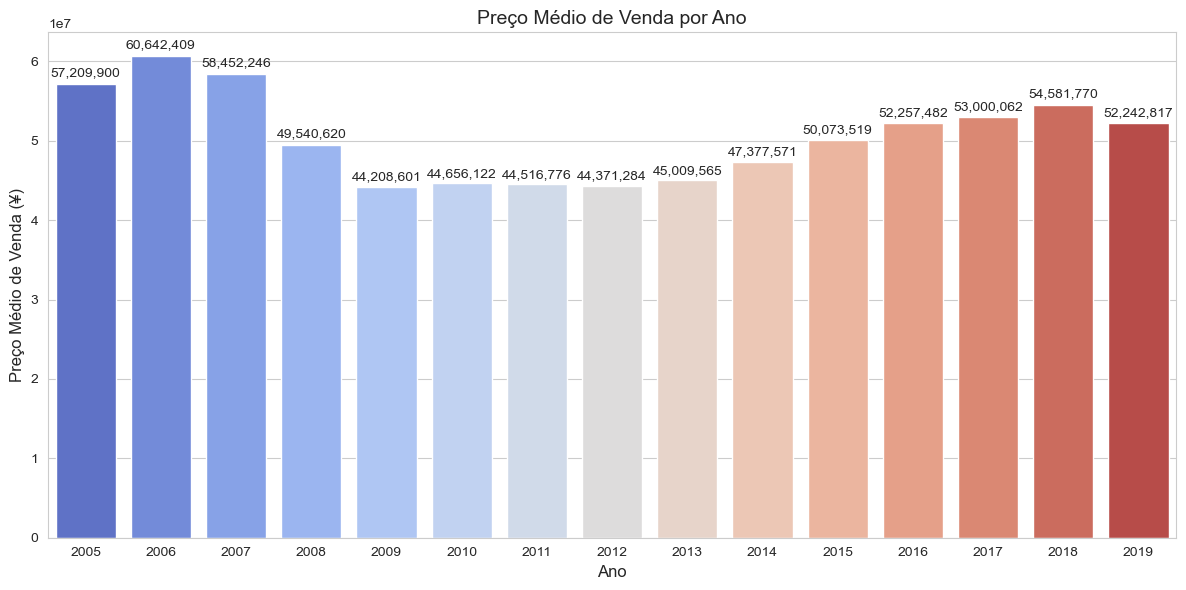

In [33]:
# Calcula a mediana do preço de venda por formato do terreno (LandShape)
preco_landshape = (
    df_eda.groupby('LandShape')['TradePrice']
    .median()
    .sort_values(ascending=False)
)

# Calcula a mediana do preço de venda por direção (Direction)
preco_direction = (
    df_eda.groupby('Direction')['TradePrice']
    .median()
    .sort_values(ascending=False)
)

# Calcula o preço médio anual
preco_ano = (
    df_eda.groupby('Year')['TradePrice']
    .mean()
    .reset_index()
)

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Year',
    y='TradePrice',
    data=preco_ano,
    palette='coolwarm'
)

# Configurações de título e eixos
plt.title("Preço Médio de Venda por Ano", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Preço Médio de Venda (¥)", fontsize=12)

# Adiciona os valores numéricos acima de cada barra
for i, v in enumerate(preco_ano['TradePrice']):
    plt.text(
        i,
        v + 0.01 * v,
        f"{int(v):,}",
        ha='center',
        va='bottom',
        fontsize=10
    )

# Ajusta margens e exibe o gráfico
plt.tight_layout()
plt.show()


**Análise**

Graáfico de barra apresenta a evolução do preço médio de venda dos imóveis entre 2005 e 2019. Verifica-se um pico em 2006, com preço médio próximo de ¥60,6 milhões, seguido de uma queda contínua até 2011, atingindo cerca de ¥44 milhões. A partir de 2013, observa-se uma tendência de recuperação gradual, com os preços voltando a ultrapassar ¥50 milhões e atingindo ¥54,5 milhões em 2018. Essa oscilação temporal sugere a presença de ciclos de valorização e retração no mercado imobiliário japonês, possivelmente associados a variações macroeconômicas e políticas urbanas do período. Para o modelo preditivo, a variável Year deve ser incorporada para representar tendências de longo prazo no preço, podendo ser utilizada como variável contínua, categórica ou combinada com Quarter para capturar sazonalidade mais fina.

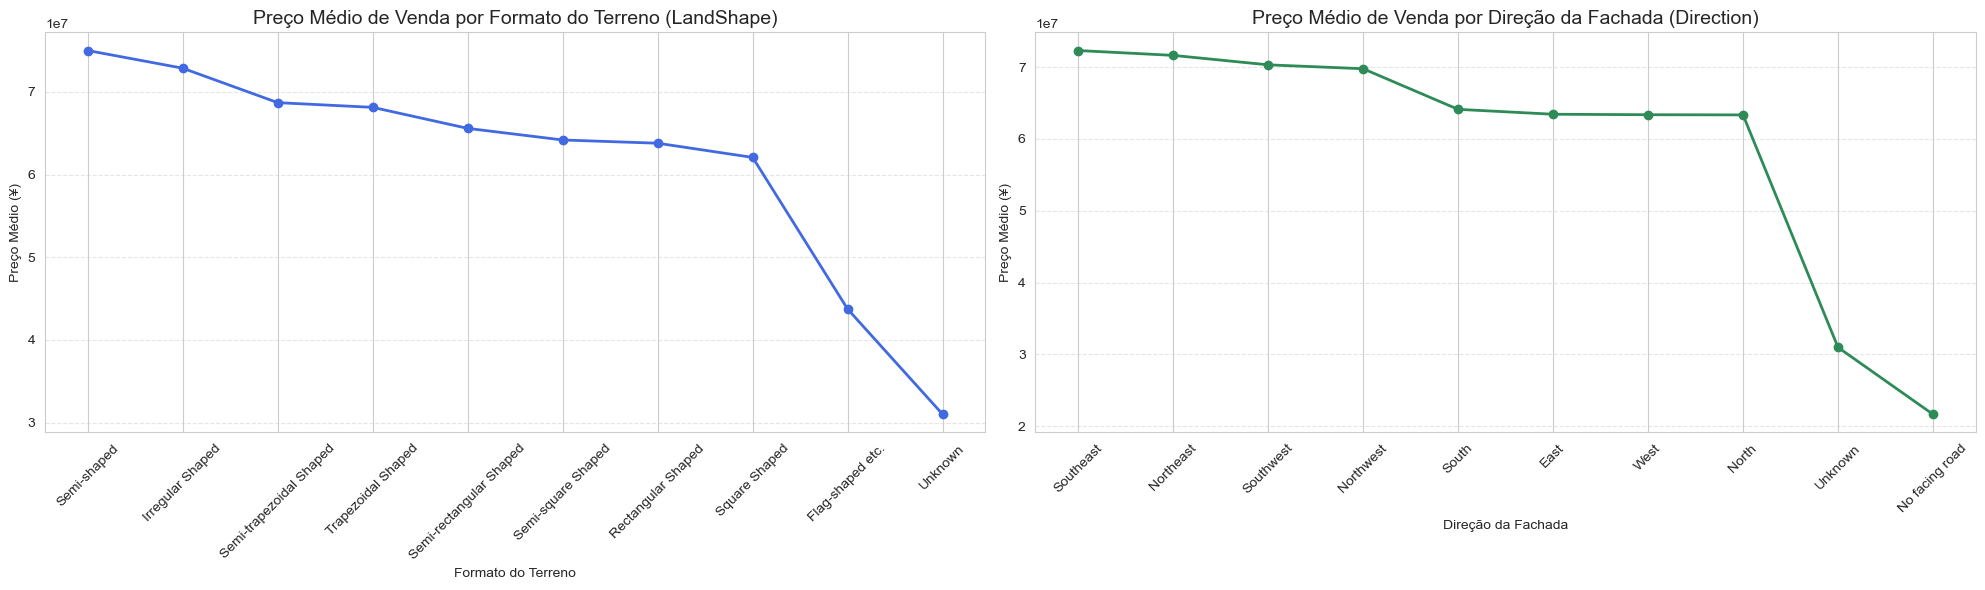

In [34]:
# Agrupa o preço médio de venda por formato do terreno (LandShape)
preco_landshape = (
    df_eda.groupby('LandShape')['TradePrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Agrupa o preço médio de venda por direção da fachada (Direction)
preco_direction = (
    df_eda.groupby('Direction')['TradePrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Cria subplots lado a lado para visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico 1 – Preço médio por formato do terreno
axes[0].plot(
    preco_landshape['LandShape'],
    preco_landshape['TradePrice'],
    marker='o',
    color='royalblue',
    linewidth=2
)
axes[0].set_title("Preço Médio de Venda por Formato do Terreno (LandShape)", fontsize=14)
axes[0].set_xlabel("Formato do Terreno")
axes[0].set_ylabel("Preço Médio (¥)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Gráfico 2 – Preço médio por direção da fachada
axes[1].plot(
    preco_direction['Direction'],
    preco_direction['TradePrice'],
    marker='o',
    color='seagreen',
    linewidth=2
)
axes[1].set_title("Preço Médio de Venda por Direção da Fachada (Direction)", fontsize=14)
axes[1].set_xlabel("Direção da Fachada")
axes[1].set_ylabel("Preço Médio (¥)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Ajusta margens e exibe o resultado
plt.tight_layout()
plt.show()

**Análise**

Aqui nesse gráfico série temporal ele comparam o preço médio de venda (¥) de imóveis conforme o formato do terreno (LandShape) e a direção da fachada (Direction). o painel esquerdo, observa-se que terrenos classificados como “Semi-shaped” e “Irregular Shaped” apresentam os maiores preços médios (entre ¥70–75 milhões), enquanto formatos “Flag-shaped” e “Unknown” possuem valores mais baixos (em torno de ¥30–45 milhões). Essa variação indica que a regularidade e a forma do terreno influenciam significativamente o valor de mercado, possivelmente pela facilidade de construção e aproveitamento da área. No painel direito, os imóveis com fachadas voltadas para Sudeste, Nordeste e Sudoeste concentram os maiores preços médios (acima de ¥70 milhões), enquanto os com orientação Sul ou sem frente direta para via pública (“No facing road”) têm valores reduzidos, chegando a ¥20 milhões. Isso sugere influência de fatores de insolação e acessibilidade sobre o preço. Ambas as variáveis (LandShape e Direction) podem contribuir para o modelo preditivo como variáveis categóricas nominais, sendo recomendável o uso de one-hot encoding ou target encoding. Além disso, deve-se tratar adequadamente as categorias “Unknown” e “No facing road”, que indicam ausência ou imprecisão de dados e podem afetar a qualidade das previsões.

### 8) Existe diferença significativa de valor entre **imóveis novos, reformados e antigos** (`Renovation`, `PrewarBuilding`)?

* **Insight:** Mede impacto de reformas e idade na precificação.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1177705255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['Prewar_Label'] = df_eda['PrewarBuilding'].map({
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1177705255.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1177705255.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


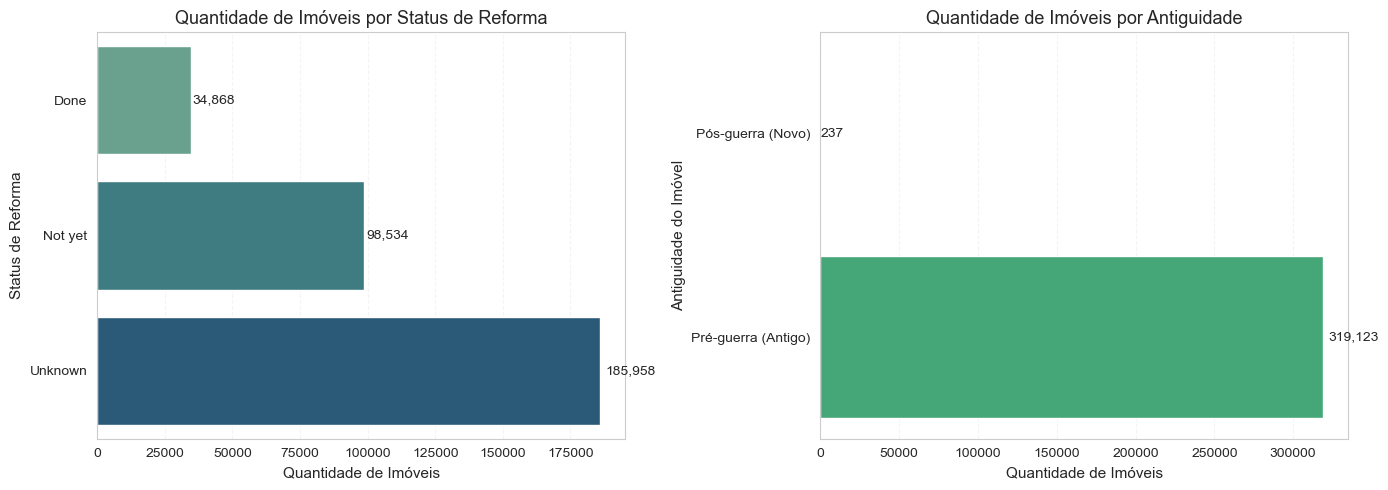

In [35]:
# Garante a existência da coluna de rótulo amigável para o status pré/pós-guerra
if 'PrewarBuilding' in df_eda.columns:
    df_eda['Prewar_Label'] = df_eda['PrewarBuilding'].map({
        0: "Pré-guerra (Antigo)",
        1: "Pós-guerra (Novo)"
    })
else:
    raise ValueError("Coluna 'PrewarBuilding' não encontrada no DataFrame.")

# Contagem de imóveis por status de reforma
contagem_reno = (
    df_eda.groupby('Renovation')['TradePrice']
    .count()
    .sort_values(ascending=True)
)

# Contagem de imóveis por antiguidade (pré/pós-guerra)
contagem_prewar = (
    df_eda.groupby('Prewar_Label')['TradePrice']
    .count()
    .sort_values(ascending=True)
)

# Cria subplots lado a lado para visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1 – Quantidade de imóveis por status de reforma
sns.barplot(
    x=contagem_reno.values,
    y=contagem_reno.index,
    palette='crest',
    ax=axes[0]
)
axes[0].set_title("Quantidade de Imóveis por Status de Reforma", fontsize=13)
axes[0].set_xlabel("Quantidade de Imóveis", fontsize=11)
axes[0].set_ylabel("Status de Reforma", fontsize=11)
axes[0].grid(axis='x', linestyle='--', alpha=0.2)

# Adiciona os valores numéricos ao lado das barras
for i, v in enumerate(contagem_reno.values):
    axes[0].text(v + 0.01 * v, i, f"{v:,}", va='center', fontsize=10)

# Gráfico 2 – Quantidade de imóveis por antiguidade (pré/pós-guerra)
sns.barplot(
    x=contagem_prewar.values,
    y=contagem_prewar.index,
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title("Quantidade de Imóveis por Antiguidade", fontsize=13)
axes[1].set_xlabel("Quantidade de Imóveis", fontsize=11)
axes[1].set_ylabel("Antiguidade do Imóvel", fontsize=11)
axes[1].grid(axis='x', linestyle='--', alpha=0.2)

# Adiciona os valores numéricos ao lado das barras
for i, v in enumerate(contagem_prewar.values):
    axes[1].text(v + 0.01 * v, i, f"{v:,}", va='center', fontsize=10)

# Ajusta espaçamento e exibe o resultado
plt.tight_layout()
plt.show()

**Análise**

Nesse indicador ele apresentam a distribuição dos imóveis segundo o status de reforma (Renovation) e a antiguidade da construção (PrewarBuilding). No gráfico à esquerda, observa-se que a maioria dos registros está classificada como “Unknown” (≈185 mil imóveis), o que indica ausência de informação consistente sobre reformas. Entre os imóveis com status conhecido, aproximadamente 98 mil ainda não passaram por reforma, enquanto apenas 34 mil foram reformados. Isso evidencia que reformas completas são relativamente raras dentro do conjunto analisado. No gráfico à direita, a variável de antiguidade mostra predominância quase total de imóveis construídos após a Segunda Guerra Mundial (≈319 mil unidades), enquanto apenas 237 são classificados como anteriores a 1945. Essa distribuição confirma que o mercado imobiliário é composto majoritariamente por construções modernas ou contemporâneas. Para o modelo preditivo, o status de reforma pode atuar como um indicador de conservação, embora exija tratamento para os valores ausentes. Já a variável antiguidade apresenta baixa variabilidade, podendo ter impacto limitado na explicação do preço, mas pode ser mantida como feature categórica complementar.

### 9) Qual o impacto do **zoneamento urbano** (`CityPlanning`, `Classification`, `CoverageRatio`, `FloorAreaRatio`) sobre o valor dos imóveis?

* **Insight:** Suporte a decisões de investimento e desenvolvimento urbano.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\2150707781.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


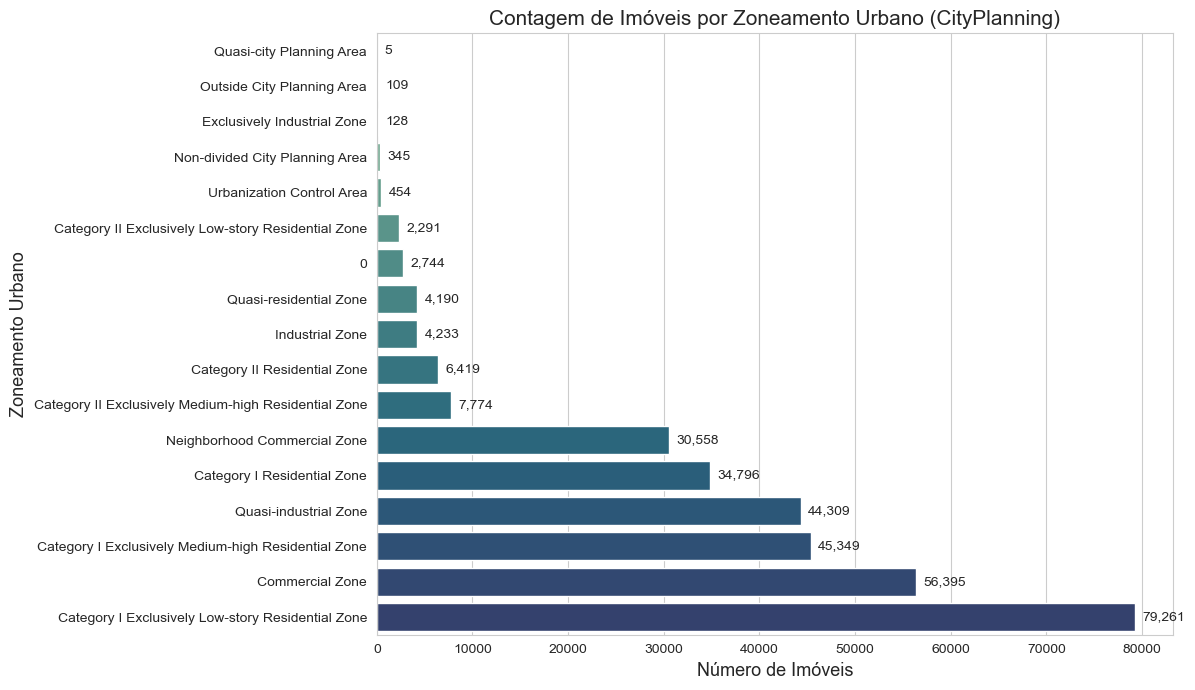

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\2150707781.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


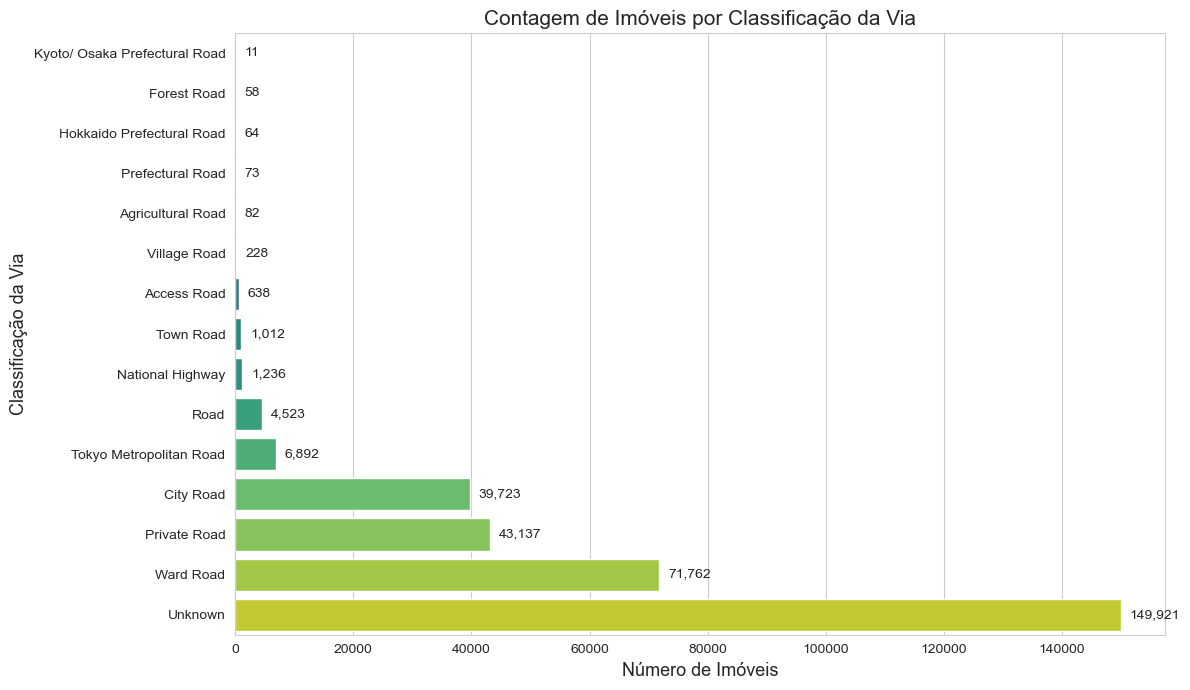

Correlação entre indicadores de zoneamento urbano e preço de venda:
CoverageRatio     0.058587
FloorAreaRatio    0.080060
TradePrice        1.000000
Name: TradePrice, dtype: float64


In [36]:
# Conta o número de imóveis em cada categoria de zoneamento
cityplan_counts = df_eda['CityPlanning'].value_counts().sort_values(ascending=True)

# Cria o gráfico de barras horizontal
plt.figure(figsize=(12, 7))
sns.barplot(
    x=cityplan_counts.values,
    y=cityplan_counts.index,
    palette='crest'
)
plt.title("Contagem de Imóveis por Zoneamento Urbano (CityPlanning)", fontsize=15)
plt.xlabel("Número de Imóveis", fontsize=13)
plt.ylabel("Zoneamento Urbano", fontsize=13)

# Adiciona os valores absolutos ao lado de cada barra
for i, v in enumerate(cityplan_counts.values):
    plt.text(v + cityplan_counts.max() * 0.01, i, f"{v:,}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Contagem de imóveis por classificação da via (Classification)
# Conta o número de imóveis por classificação de via
classification_counts = df_eda['Classification'].value_counts().sort_values(ascending=True)

# Cria o gráfico de barras horizontal
plt.figure(figsize=(12, 7))
sns.barplot(
    x=classification_counts.values,
    y=classification_counts.index,
    palette='viridis'
)
plt.title("Contagem de Imóveis por Classificação da Via", fontsize=15)
plt.xlabel("Número de Imóveis", fontsize=13)
plt.ylabel("Classificação da Via", fontsize=13)

# Adiciona os valores absolutos ao lado de cada barra
for i, v in enumerate(classification_counts.values):
    plt.text(v + classification_counts.max() * 0.01, i, f"{v:,}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Correlação entre indicadores urbanos e preço de venda

# Define as colunas de interesse
cols = ['CoverageRatio', 'FloorAreaRatio', 'TradePrice']

# Calcula a matriz de correlação
corr_zoneamento = df_eda[cols].corr()

# Exibe a correlação das variáveis urbanísticas com o preço de venda
print("Correlação entre indicadores de zoneamento urbano e preço de venda:")
print(corr_zoneamento['TradePrice'])

**Análise**

Nesse indicador ele apresenta a distribuição dos imóveis segundo o tipo de zoneamento urbano (CityPlanning). Observa-se que a maioria está concentrada em áreas residenciais de baixa densidade, especialmente na categoria “Category I Exclusively Low-story Residential Zone”, com aproximadamente 79 mil imóveis, seguida de “Commercial Zone” (≈56 mil) e “Category I Exclusively Medium-high Residential Zone” (≈45 mil). As zonas comerciais e residenciais mistas representam uma parte expressiva da amostra, indicando que o mercado é majoritariamente voltado a uso residencial urbano consolidado, com forte presença de comércio local. Por outro lado, áreas industriais ou de controle de urbanização apresentam baixa representatividade, o que sugere menor volume de transações nessas regiões. Para fins de modelagem, a variável CityPlanning deve ser tratada como categórica nominal, podendo ser codificada por one-hot encoding ou target encoding. Além disso, a predominância de determinadas categorias recomenda o uso de balanceamento ou regularização, para evitar que zonas majoritárias dominem a predição do modelo.

Já no segundo gráfico mostra a quantidade de imóveis distribuídos por tipo de via pública associada ao endereço (Classification). Nota-se uma concentração significativa em três categorias principais:

**“Unknown”: cerca de 149 mil registros, indicando ausência de informação sobre a via**

**“Ward Road”: aproximadamente 71 mil imóveis;**

**“Private Road” e “City Road”: em torno de 43 mil e 39 mil imóveis, respectivamente.**

As demais classificações como National Highway, Access Road e Prefectural Road representam baixa participação no conjunto, com poucos milhares ou até centenas de registros. A alta incidência de valores “Unknown” sugere inconsistência ou falta de padronização nos dados cadastrais, exigindo atenção no pré-processamento (ex.: imputação, exclusão ou categoria separada). Para o modelo preditivo, essa variável deve ser tratada como categórica nominal, podendo ser codificada via one-hot encoding ou target encoding. As categorias raras podem ser agrupadas sob uma classe genérica, reduzindo dispersão e sobreajuste.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\7881938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['CityPlanning'] = df_eda['CityPlanning'].replace('0', np.nan)


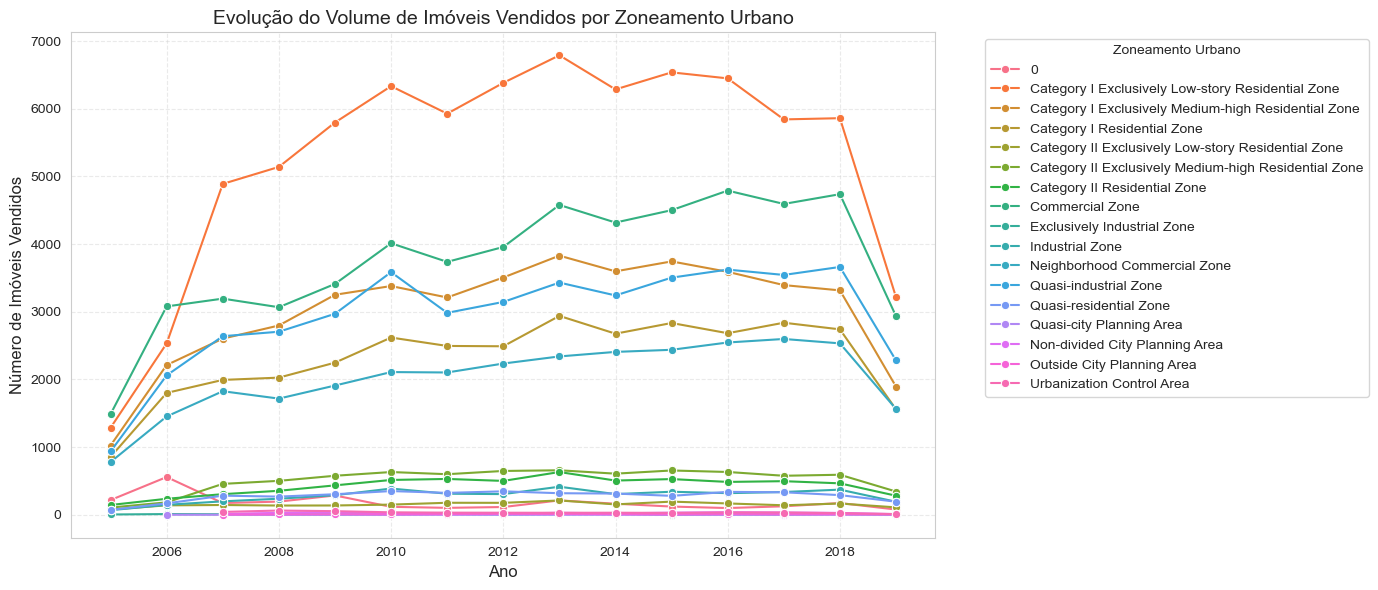

In [37]:
# Correção de valores imputados incorretamente
df_eda['CityPlanning'] = df_eda['CityPlanning'].replace('0', np.nan)

# Remove registros com zoneamento urbano ausente
df_eda_filtrado = df_eda[df_eda['CityPlanning'].notna()]

# Agrupamento de imóveis por ano e zoneamento urbano
zoneamento_ano = (
    df_eda_filtrado
    .groupby(['Year', 'CityPlanning'])
    .size()
    .reset_index(name='count')
)

# Gráfico: evolução do volume de imóveis vendidos por zoneamento urbano
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=zoneamento_ano,
    x='Year',
    y='count',
    hue='CityPlanning',
    marker='o'
)

plt.title("Evolução do Volume de Imóveis Vendidos por Zoneamento Urbano", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de Imóveis Vendidos", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Zoneamento Urbano')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**Análise**

**Objetivo**

Avaliar como o volume de transações imobiliárias em Tóquio evoluiu entre 2005 e 2019, considerando o tipo de zoneamento urbano (*City Planning*). O objetivo é identificar quais áreas apresentam maior dinâmica de mercado e se há padrões temporais relevantes.

**Principais Observações**

1. **Predominância de zonas residenciais de baixa densidade**
   As zonas Category I Exclusively Low-story Residential Zone concentram consistentemente o maior volume de vendas ao longo de todo o período, ultrapassando 6.000 imóveis vendidos por ano nos picos de 2012–2014.
   Isso reflete o alto dinamismo de compra e venda em áreas predominantemente residenciais e de baixa altura, típicas de bairros familiares de Tóquio.

2. **Zonas residenciais de média e alta densidade (Category I e II)**
   Apresentam volumes médios (entre 2.000 e 4.000 imóveis/ano), porém com tendência estável ou levemente crescente até 2016, antes de uma queda discreta nos anos finais.
   Essa estabilidade indica mercado maduro, com oferta e demanda equilibradas.

3. **Zonas comerciais e industriais**

   * Commercial Zone e Neighborhood Commercial Zone apresentam comportamento intermediário, com volumes regulares (entre 2.000 e 3.000 unidades anuais).
   * Industrial Zone e Exclusively Industrial Zone registram baixo volume de transações, o que é esperado devido à menor frequência de compra e venda em propriedades industriais.

4. **Áreas de planejamento especial e controle de urbanização**
   Categorias como Urbanization Control Area e Outside City Planning Area exibem volumes quase residuais (inferiores a 500 imóveis/ano), indicando restrições urbanísticas severas e baixo dinamismo imobiliário nessas regiões.

5. **Pico e desaceleração (2010–2013 → 2018–2019)**
   A maior parte das categorias apresenta pico de vendas entre 2010 e 2013, seguido de leve desaceleração a partir de 2016.
   Essa tendência possivelmente reflete:

   * Esforços de reurbanização pós-crise global de 2008 e reconstruções após o terremoto de 2011;
   * Posterior estabilização do mercado com redução de novas construções.

**Interpretação Geral**

* O gráfico revela uma forte centralização das transações em zonas residenciais, sobretudo nas áreas de baixa densidade, que sustentam a maior parte do mercado imobiliário de Tóquio.
* O comportamento cíclico — com crescimento até 2013 e leve retração posterior — sugere maturação do mercado urbano, com menor especulação e maior estabilidade no estoque de imóveis.
* Zonas industriais e de controle urbanístico têm participação marginal, o que reforça o caráter altamente residencial e regulado do território metropolitano.

**Conclusão**

O zoneamento urbano é um fator determinante para o volume de vendas imobiliárias.
As zonas residenciais de baixa densidade representam o núcleo mais ativo do mercado, enquanto áreas comerciais e industriais exercem papel complementar.
Essas informações são cruciais para modelos de previsão de preço e demanda, permitindo ponderar a variável CityPlanning como um atributo relevante e não linear no comportamento do mercado.

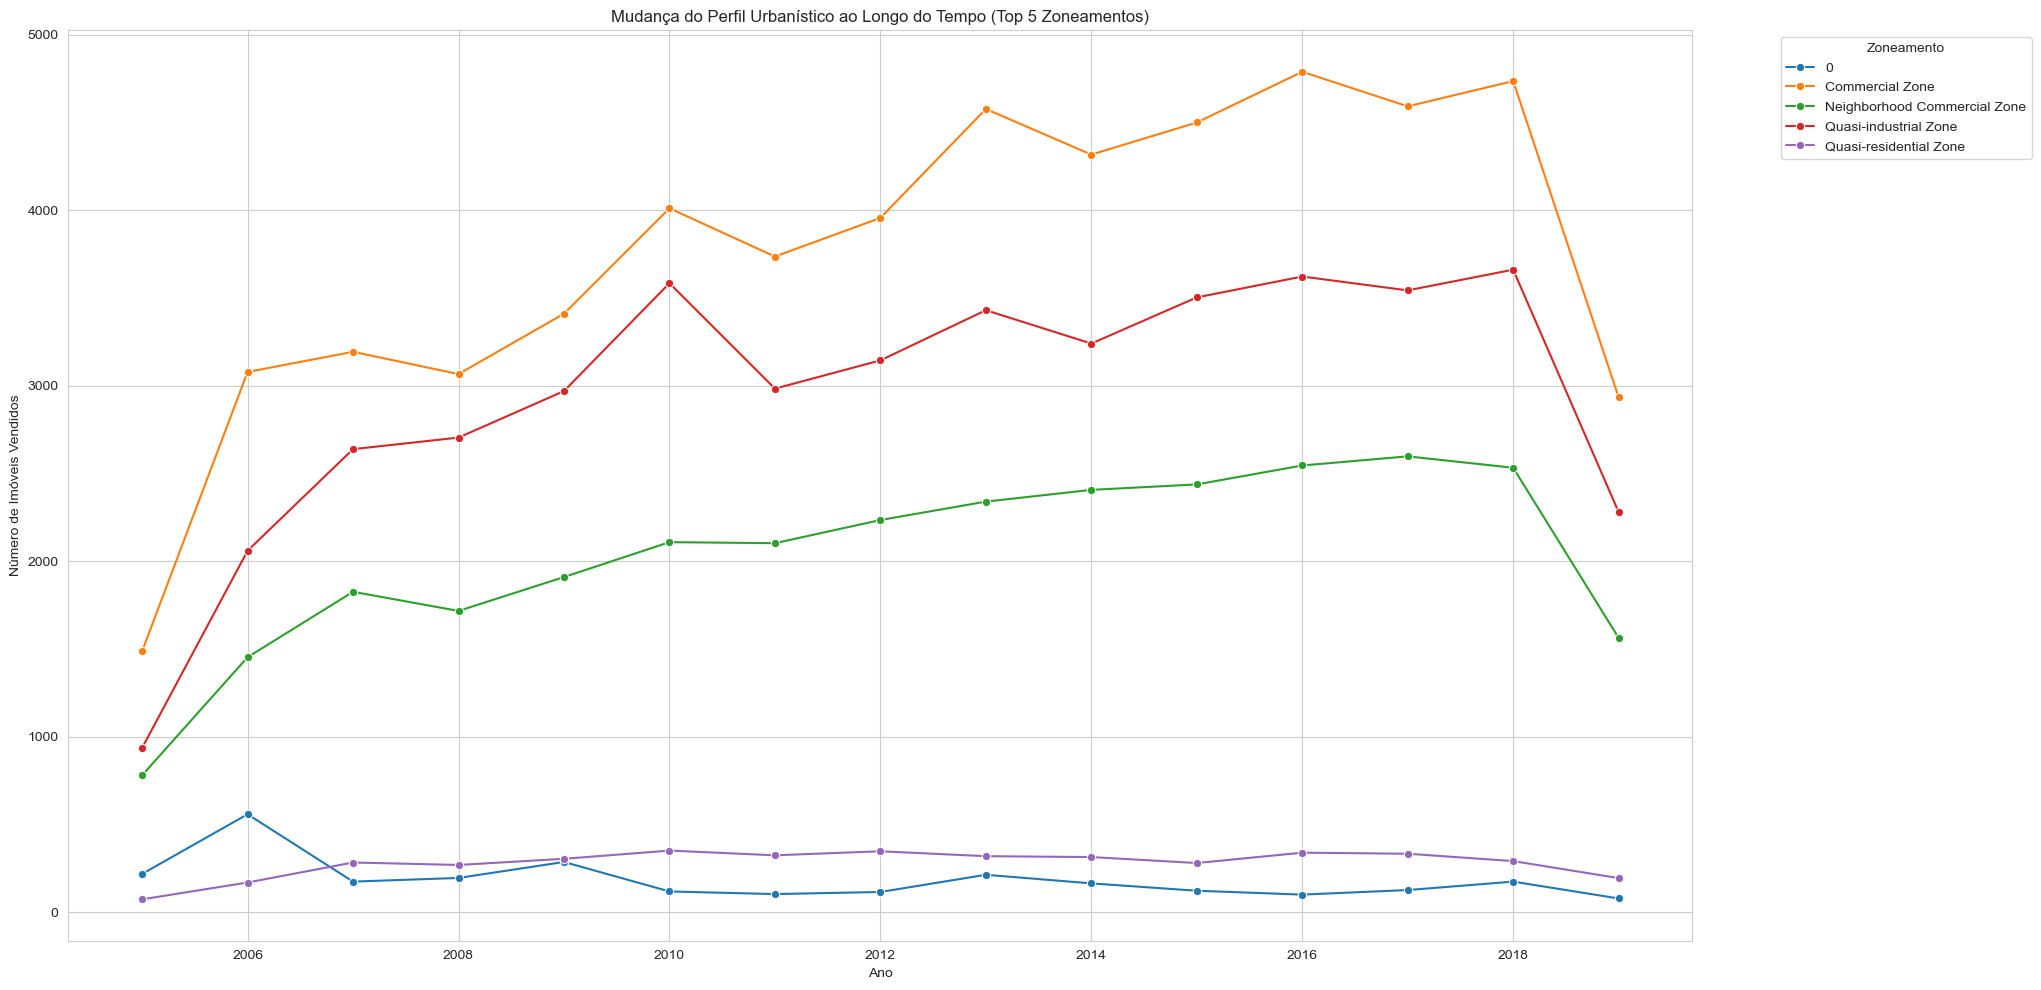

In [38]:
# Mudança do perfil urbanístico ao longo do tempo

# Conta imóveis vendidos por ano e tipo de zoneamento
perfil_urbano = df_eda.groupby(['Year', 'CityPlanning']).size().reset_index(name='count')

# Seleciona as 5 zonas mais comuns para evitar poluição visual
top_zonas = perfil_urbano['CityPlanning'].value_counts().index[:5]
perfil_urbano = perfil_urbano[perfil_urbano['CityPlanning'].isin(top_zonas)]

# Gráfico de evolução temporal do perfil urbanístico
plt.figure(figsize=(20.5, 10))
sns.lineplot(
    x='Year',
    y='count',
    hue='CityPlanning',
    data=perfil_urbano,
    marker='o'
)

plt.title("Mudança do Perfil Urbanístico ao Longo do Tempo (Top 5 Zoneamentos)")
plt.xlabel("Ano")
plt.ylabel("Número de Imóveis Vendidos")
plt.legend(title="Zoneamento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Análise:**

O gráfico apresenta a evolução do número de imóveis vendidos entre 2005 e 2019 nas cinco principais categorias de zoneamento urbano. Observa-se que a Commercial Zone possui o maior volume de vendas durante todo o período, variando entre aproximadamente 3.000 e 4.800 imóveis por ano. Essa categoria mostra crescimento constante até 2016, com leve redução nos anos seguintes. A Neighborhood Commercial Zone apresenta comportamento semelhante, embora com valores ligeiramente menores. Ambas indicam forte concentração de transações em áreas com uso predominantemente comercial. A Quasi-industrial Zone mantém trajetória de crescimento moderado e contínuo ao longo dos anos, saindo de valores próximos a 1.000 imóveis para cerca de 2.500 ao final do período. Isso sugere aumento gradual na utilização dessas áreas para fins mistos, acompanhando a readequação de espaços urbanos. A Quasi-residential Zone e a categoria identificada como 0 (sem classificação) registram volumes muito inferiores, com pequenas variações anuais e comportamento estável. O baixo número de transações nessas zonas indica menor dinamismo imobiliário ou áreas de ocupação consolidada com pouca oferta disponível.De forma geral, o gráfico evidencia que o mercado imobiliário se concentra majoritariamente nas zonas comerciais e industriais leves, com tendência de estabilidade após um período de expansão até meados da década de 2010. Essa distribuição reflete o processo de urbanização densa e a priorização de usos comerciais em regiões com maior infraestrutura urbana.

### 10) Quais são os **outliers de preço e área**?

Eles estão concentrados em bairros específicos, tipos de imóvel ou períodos do tempo?

* **Insight:** Identifica oportunidades, riscos ou anomalias de mercado.

In [39]:
from scipy.stats import zscore

# Cálculo do Z-score para as variáveis de área e preço
df_eda['z_area'] = zscore(df_eda['Area'])
df_eda['z_price'] = zscore(df_eda['TradePrice'])

# Criação da máscara de outliers (|z| > 3 em área ou preço)
outlier_mask = (df_eda['z_area'].abs() > 3) | (df_eda['z_price'].abs() > 3)

# Separação dos conjuntos com e sem outliers
df_outliers = df_eda[outlier_mask]
df_nao_outliers = df_eda[~outlier_mask]

# Identificação dos bairros mais frequentes entre os outliers
top_bairros = (
    df_outliers['Municipality']
    .value_counts()
    .head(10)
)

# Identificação dos tipos de imóvel com mais outliers
top_types_outlier = (
    df_outliers['Type']
    .value_counts()
    .head(10)
)

# Estatísticas gerais de outliers
print(f"Total de outliers encontrados: {df_outliers.shape[0]}")
print(f"Percentual de outliers: {100 * df_outliers.shape[0] / df_eda.shape[0]:.2f}%")

print("Top 10 bairros com mais outliers:")
print(top_bairros)

print("\nTop 10 tipos de imóvel entre os outliers:")
print(top_types_outlier)


Total de outliers encontrados: 11943
Percentual de outliers: 3.74%
Top 10 bairros com mais outliers:
Municipality
Minato Ward      744
Setagaya Ward    716
Shibuya Ward     603
Adachi Ward      535
Ota Ward         532
Hachioji City    507
Shinjuku Ward    441
Nerima Ward      426
Edogawa Ward     410
Machida City     393
Name: count, dtype: int64

Top 10 tipos de imóvel entre os outliers:
Type
Residential Land(Land and Building)    6346
Residential Land(Land Only)            5286
Pre-owned Condominiums, etc.            249
Forest Land                              50
Agricultural Land                        12
Name: count, dtype: int64


C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1303094592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['z_area'] = zscore(df_eda['Area'])
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1303094592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['z_price'] = zscore(df_eda['TradePrice'])


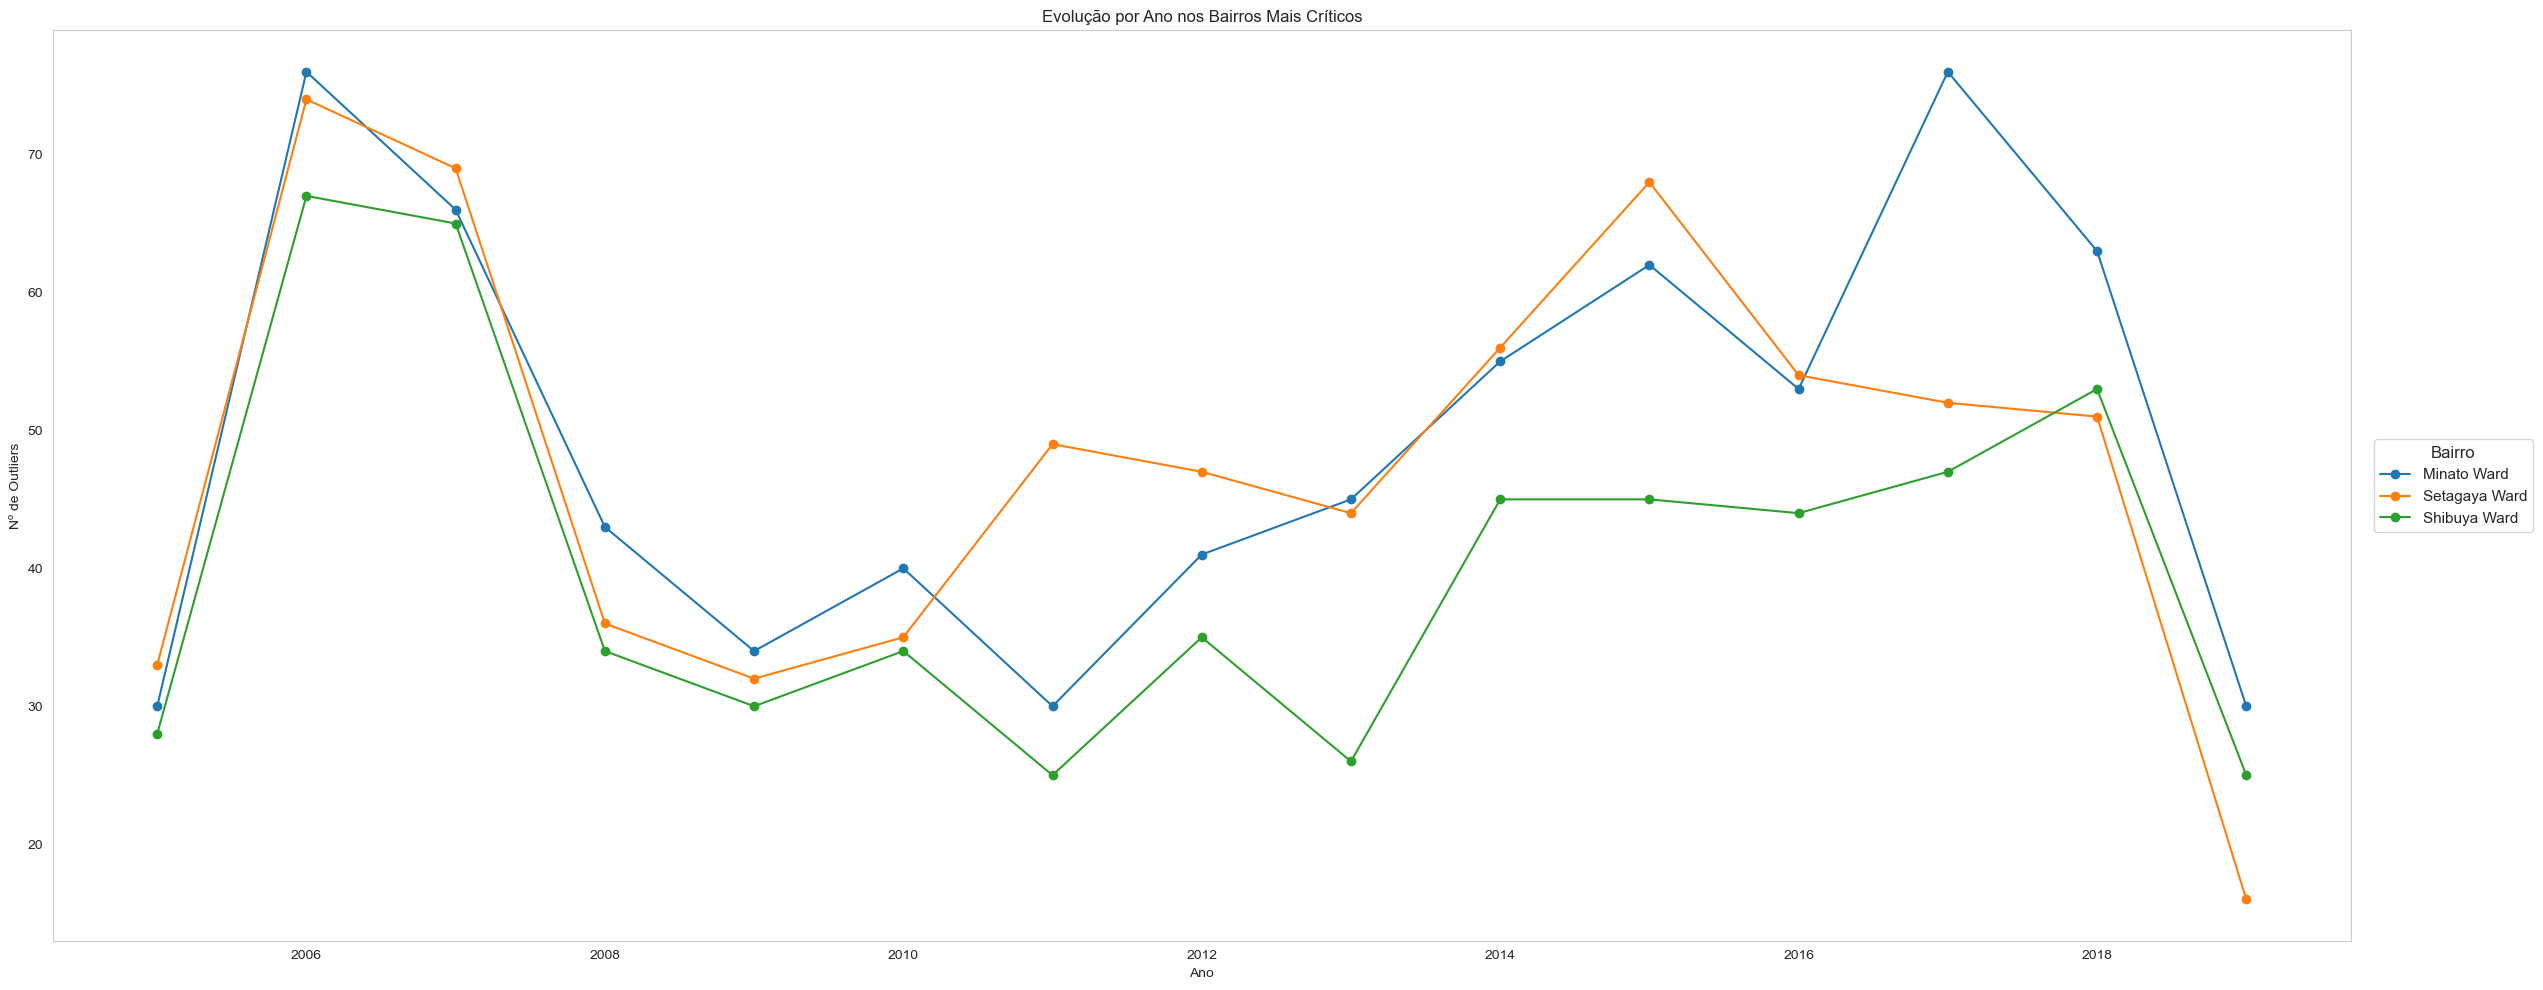

In [40]:
# Gráfico linha temporal para os 3 bairros com mais outliers:
top_bairros_index = top_bairros.index[:3]
df_top_bairros = df_outliers[df_outliers['Municipality'].isin(top_bairros_index)]
count_ano_bairro = df_top_bairros.groupby(['Year', 'Municipality']).size().unstack().fillna(0)

ax = count_ano_bairro.plot(figsize=(25.5, 10), marker='o')
plt.title('Evolução por Ano nos Bairros Mais Críticos')
plt.ylabel('Nº de Outliers')
plt.xlabel('Ano')

# Coloca a legenda fora do gráfico (à direita)
plt.legend(
    title="Bairro",
    loc='center left',
    bbox_to_anchor=(1.01, 0.5),
    borderaxespad=0,
    fontsize=11,
    title_fontsize=12
)

plt.tight_layout()
plt.grid(False)
plt.show()


**Análise:**

Nesse gráfico explicar como a variação anual no número de outliers identificados nos bairros Minato Ward**, Setagaya Ward e Shibuya Ward. Observa-se que os três bairros seguem padrões semelhantes, com picos expressivos de outliers em 2006, 2015, 2017. Esses aumentos podem estar relacionados a variações abruptas nos preços de venda dos imóveis, possivelmente influenciadas por fatores econômicos, lançamentos imobiliários de alto valor ou modificações na infraestrutura urbana. Entre 2008, 2013, nota-se um período de maior estabilidade, com redução significativa no número de valores atípicos. Esse intervalo pode representar uma fase de equilíbrio do mercado imobiliário, com menor discrepância nos preços dentro de cada bairro. Em termos comparativos, o Minato Ward apresenta os maiores valores absolutos de outliers, o que indica maior dispersão dos preços característica comum em regiões de alto padrão, onde imóveis muito valorizados coexistem com construções mais antigas. Setagaya Ward, Shibuya Ward exibem comportamentos próximos, porém com variações menos intensas. No período final da série (após 2018), há uma queda acentuada no número de outliers nos três bairros, sugerindo que o mercado se tornou mais homogêneo ou que houve menor volume de transações extremas. De modo geral, o gráfico evidencia movimentos cíclicos de valorização e correção** nos principais bairros de Tóquio, refletindo as oscilações naturais de um mercado urbano altamente dinâmico e sensível a fatores econômicos e estruturais.